<a href="https://colab.research.google.com/github/YolandaMDavis/cs109a-fall2020/blob/yolanda-eda/Milestone_4_EDA_Modeling_Yolanda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
%matplotlib inline
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
DATA_ROOT = '/content/drive/My Drive/Final-Project-for-CS109a/Milestone3/'

In [3]:
new_york_crime_data_df = pd.read_csv(DATA_ROOT + 'nyc_crime_analysis_data_final.csv').drop(columns=["Unnamed: 0"])
boston_crime_data_df = pd.read_csv(DATA_ROOT + 'boston_crime_analysis_data_final.csv').drop(columns=["Unnamed: 0"])

In [5]:
boston_crime_data_df.head()

AREA  YEAR  MONTH DAY_OF_WEEK  ...  SNOW  NIGHT  OFFENSE_TYPE VIOLENT_CRIME
0   B3  2019     11     Tuesday  ...   0.0    0.0         Other             0
1  E18  2019     11      Monday  ...   0.0    0.0         Other             0
2   A1  2019     11    Saturday  ...   0.0    1.0       Warrant             0
3   A1  2020      1   Wednesday  ...   0.0    1.0         Other             0
4   D4  2020      1      Sunday  ...   0.0    1.0         Other             0

[5 rows x 25 columns]

In [6]:
new_york_crime_data_df.head()

AREA  YEAR  MONTH DAY_OF_WEEK  ...  SNOW  NIGHT  OFFENSE_TYPE VIOLENT_CRIME
0  BRONX  2020      8      Monday  ...   0.0      1    Harassment             0
1  BRONX  2020      9   Wednesday  ...   0.0      0    Harassment             0
2  BRONX  2020      9      Friday  ...   0.0      0    Harassment             0
3  BRONX  2020      9      Monday  ...   0.0      0    Harassment             0
4  BRONX  2020      9    Saturday  ...   0.0      1    Harassment             0

[5 rows x 25 columns]

In [7]:
print(boston_crime_data_df.shape)
print(new_york_crime_data_df.shape)
print(boston_crime_data_df.columns)

(491771, 25)
(306288, 25)
Index(['AREA', 'YEAR', 'MONTH', 'DAY_OF_WEEK', 'HOUR', 'LATITUDE', 'LONGITUDE',
       'GEOHASH', 'COVID_PERIOD', 'WHITE', 'BLACK', 'ASIAN', 'HISPANIC',
       'MEDIAN_INCOME', 'LOCAL_PROP_VALUES', 'STREETLIGHT_DISTANCE',
       'POLICE_STATION_DISTANCE', 'HOSPITAL_DISTANCE', 'COLLEGE_UNIV_DISTANCE',
       'ELECTION', 'PRCP', 'SNOW', 'NIGHT', 'OFFENSE_TYPE', 'VIOLENT_CRIME'],
      dtype='object')


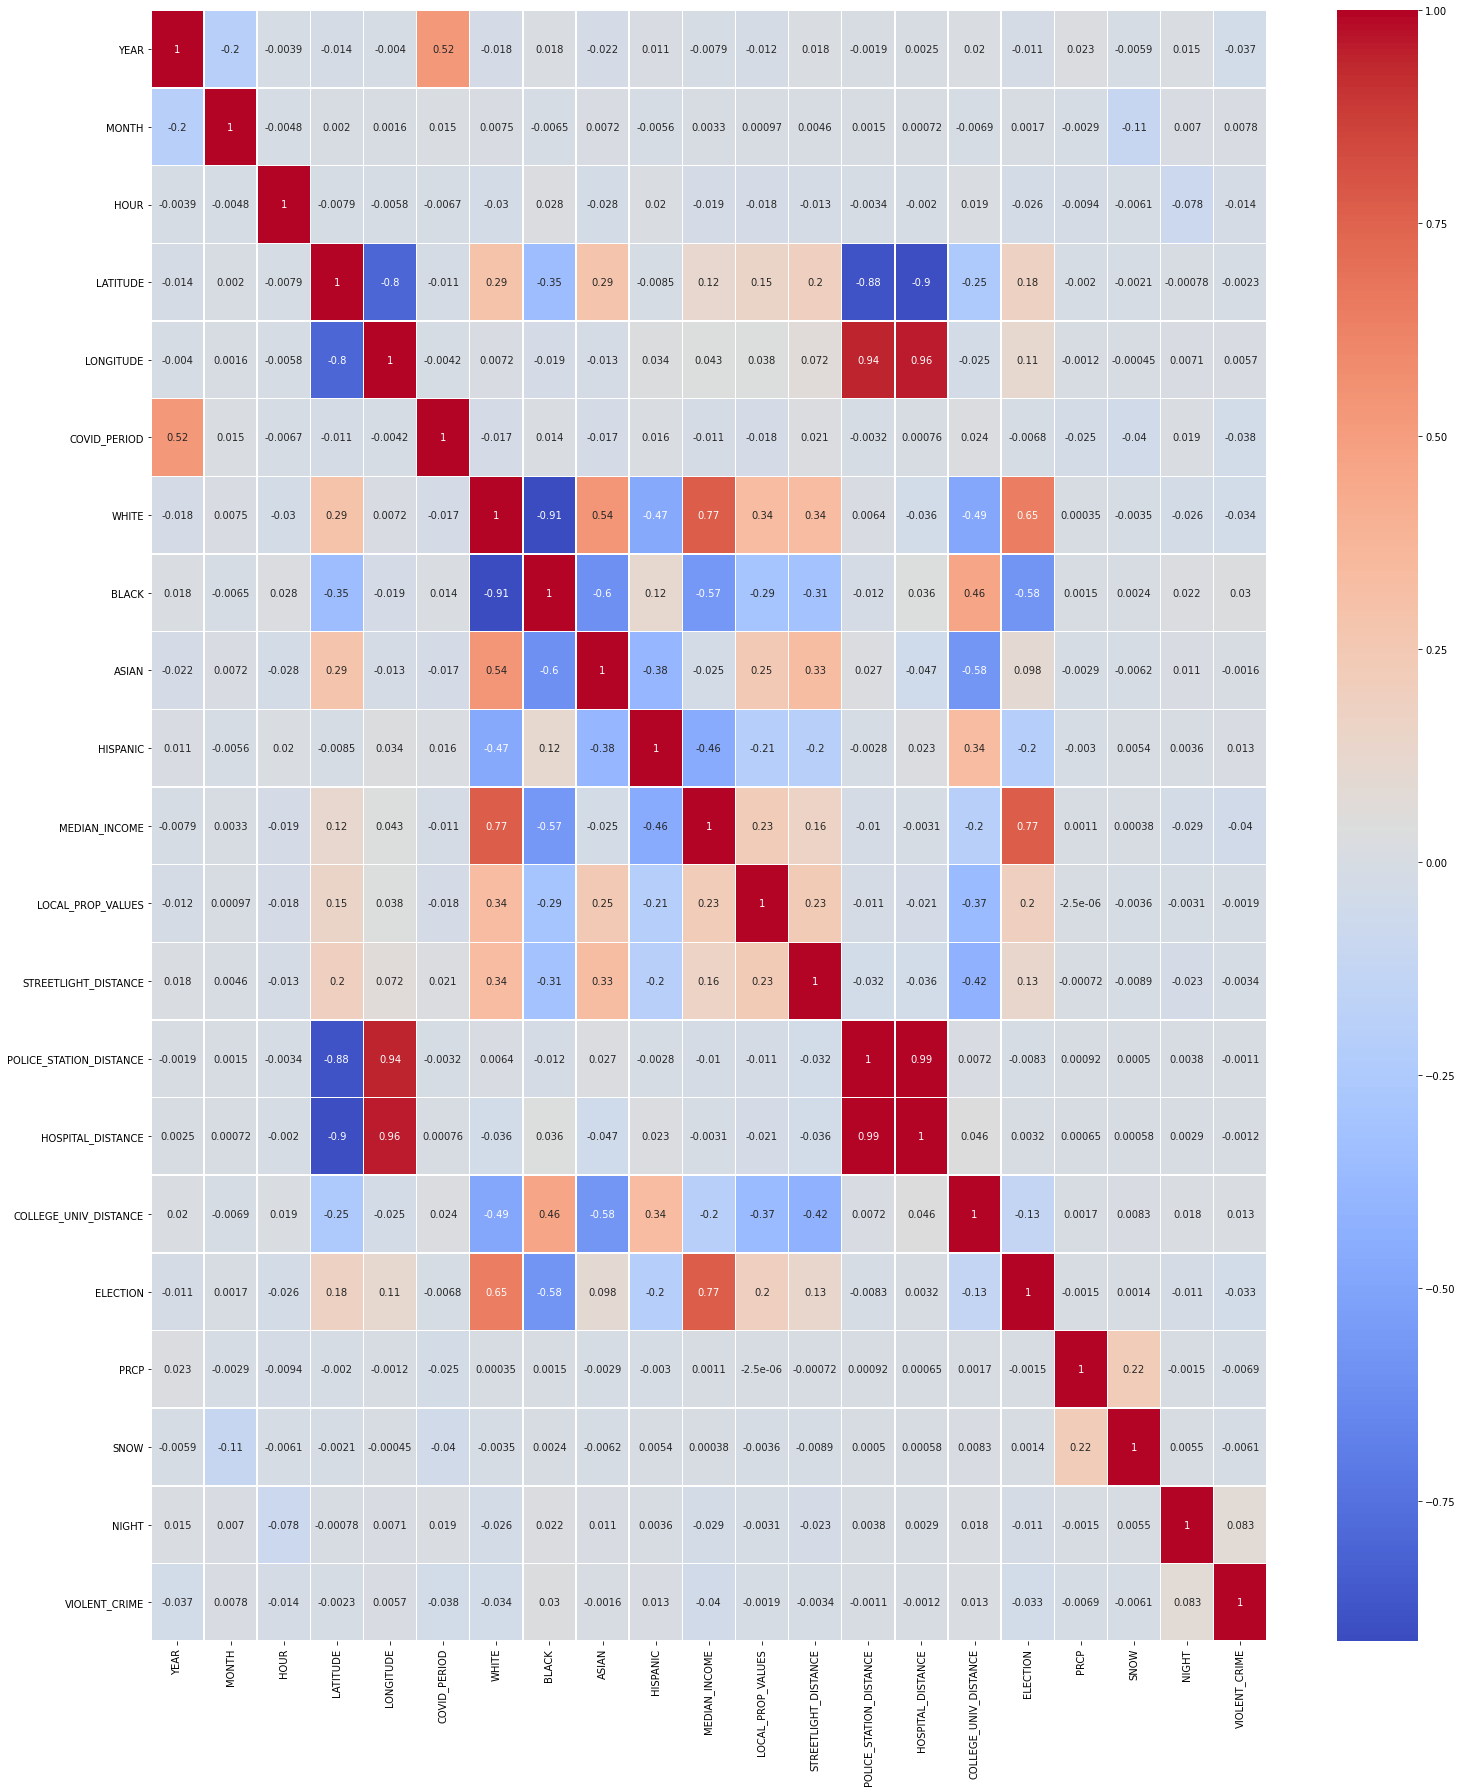

In [8]:
boston_corr = boston_crime_data_df.corr()
fig, ax = plt.subplots(figsize=(25,30)) 
ax = sns.heatmap(boston_corr, annot=True, cmap='coolwarm', linewidths=.5)

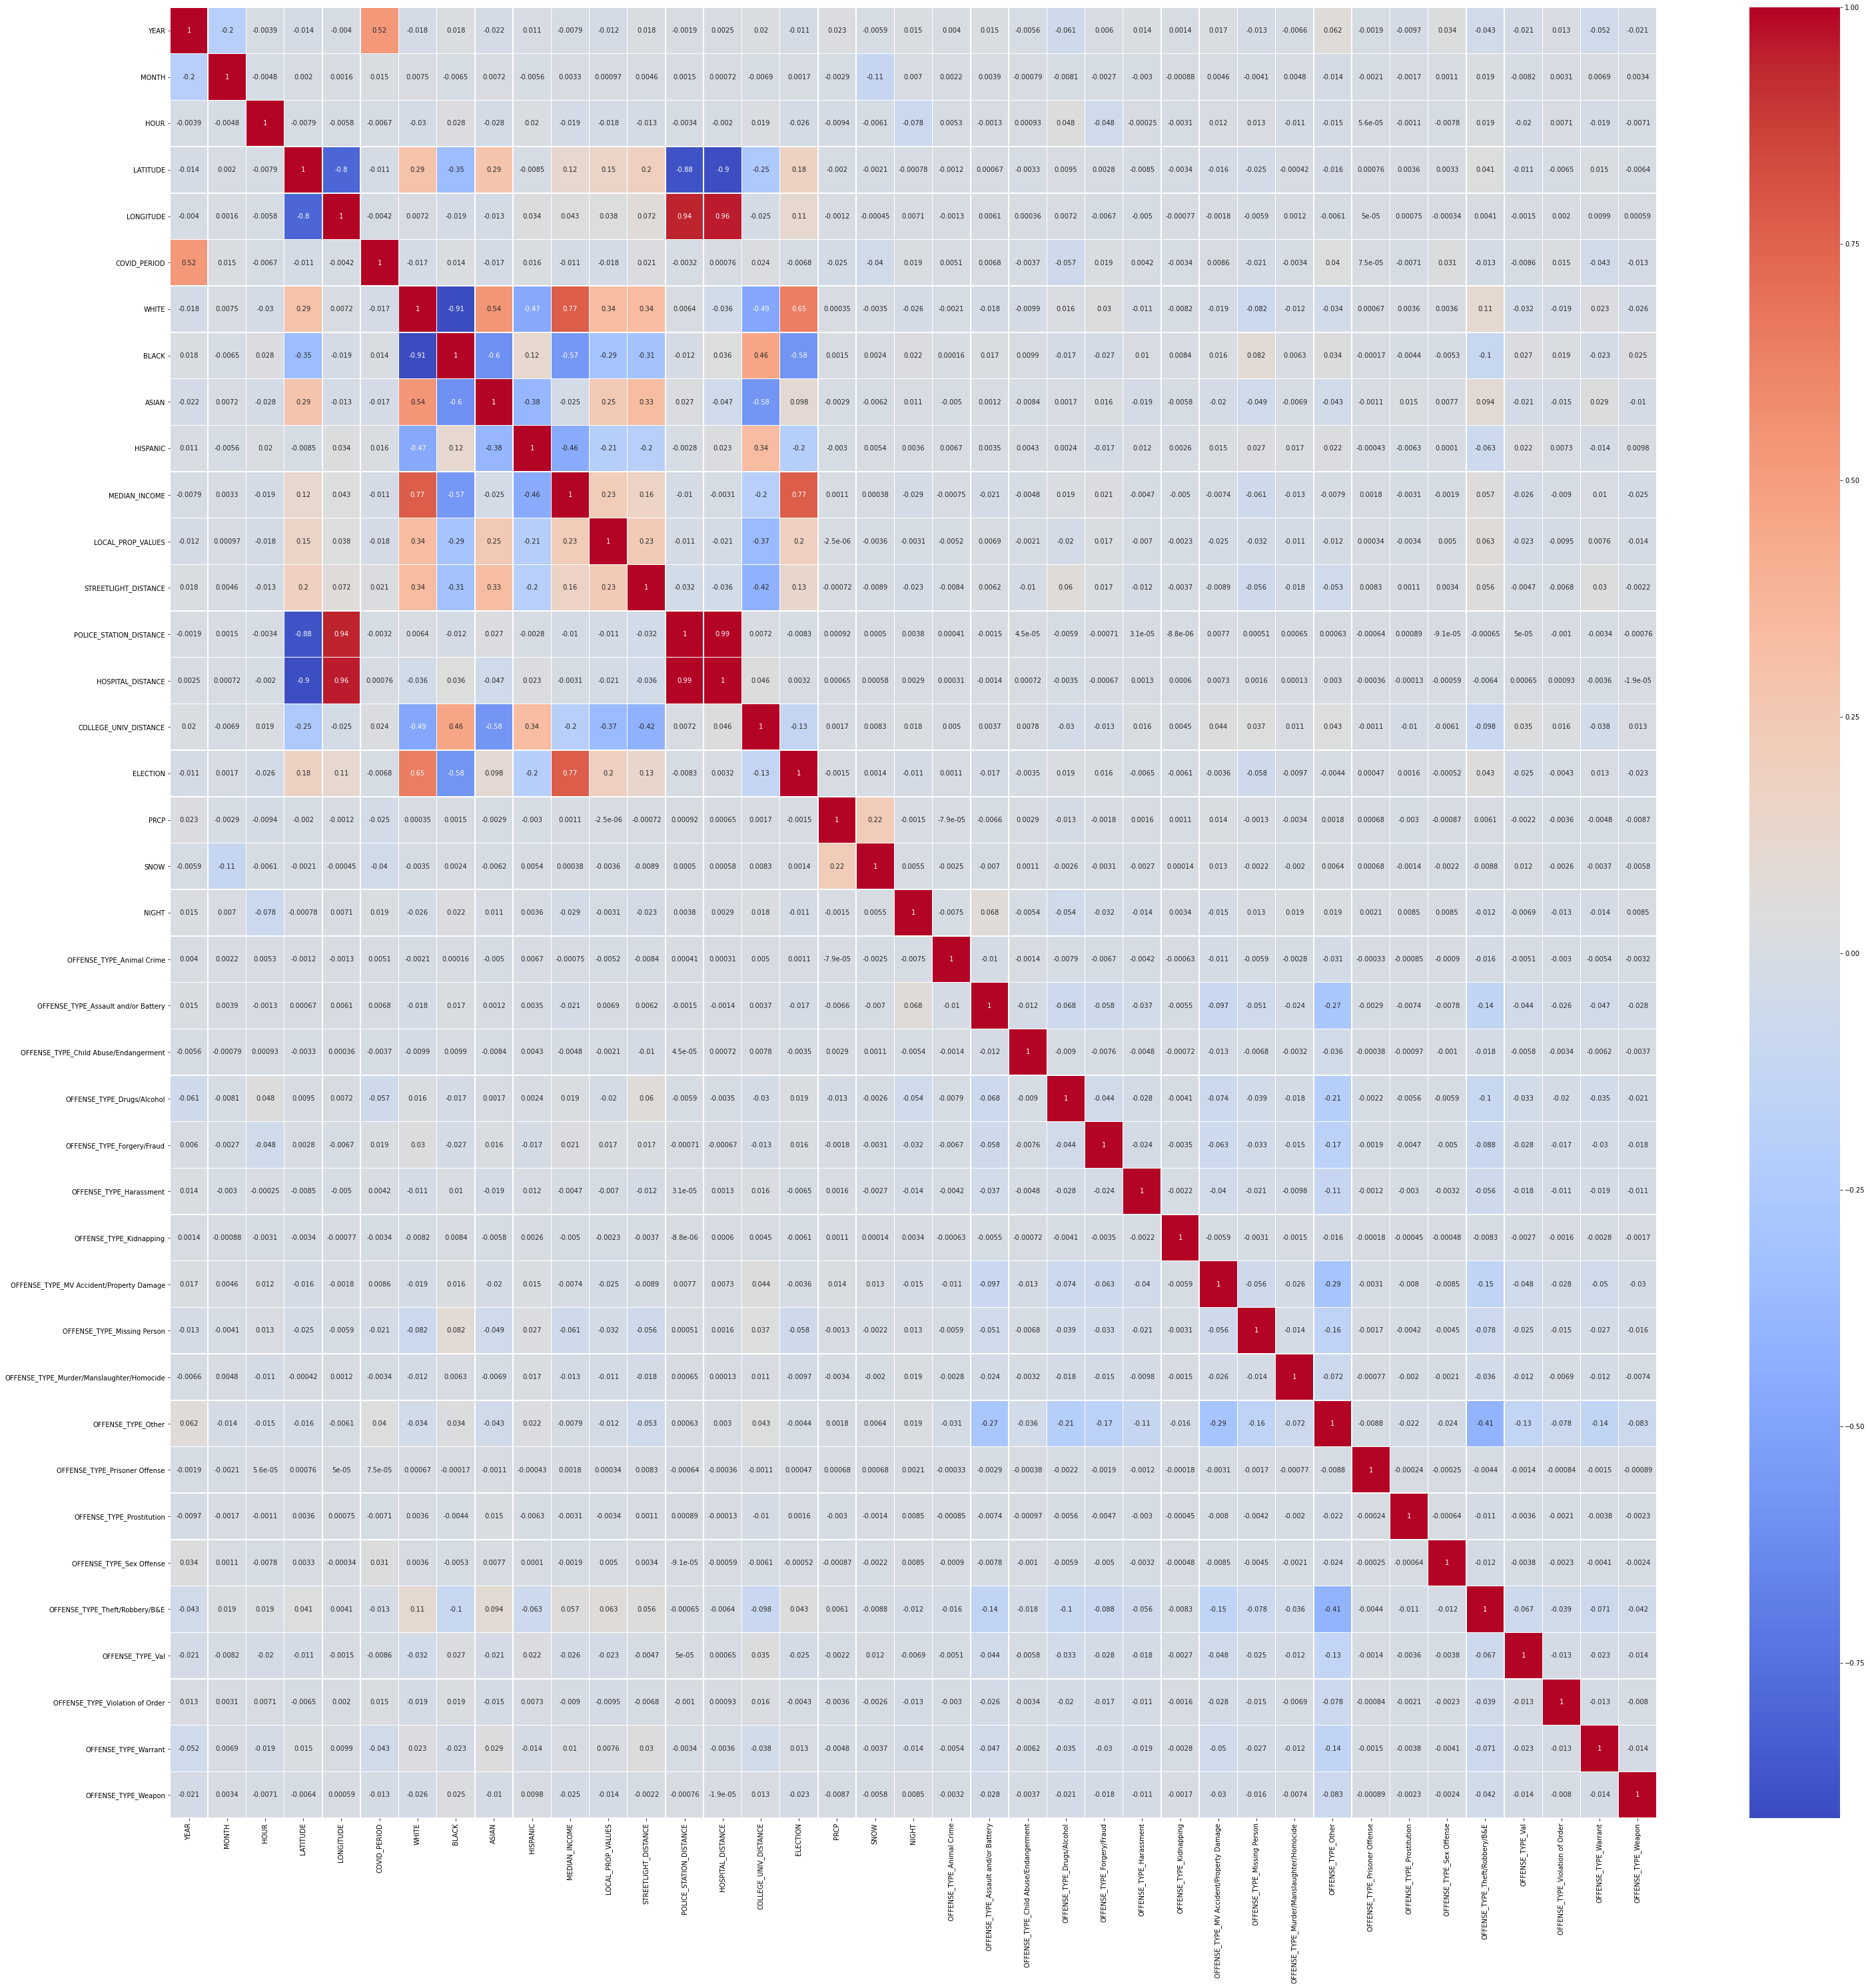

In [9]:
demog_category_columns = ['OFFENSE_TYPE']
boston_crime_dummies_df = pd.get_dummies(boston_crime_data_df, columns=demog_category_columns)
boston_corr = boston_crime_dummies_df.drop(columns=['VIOLENT_CRIME']).corr()
fig, ax = plt.subplots(figsize=(50,50)) 
ax = sns.heatmap(boston_corr, annot=True, cmap='coolwarm', linewidths=.5)

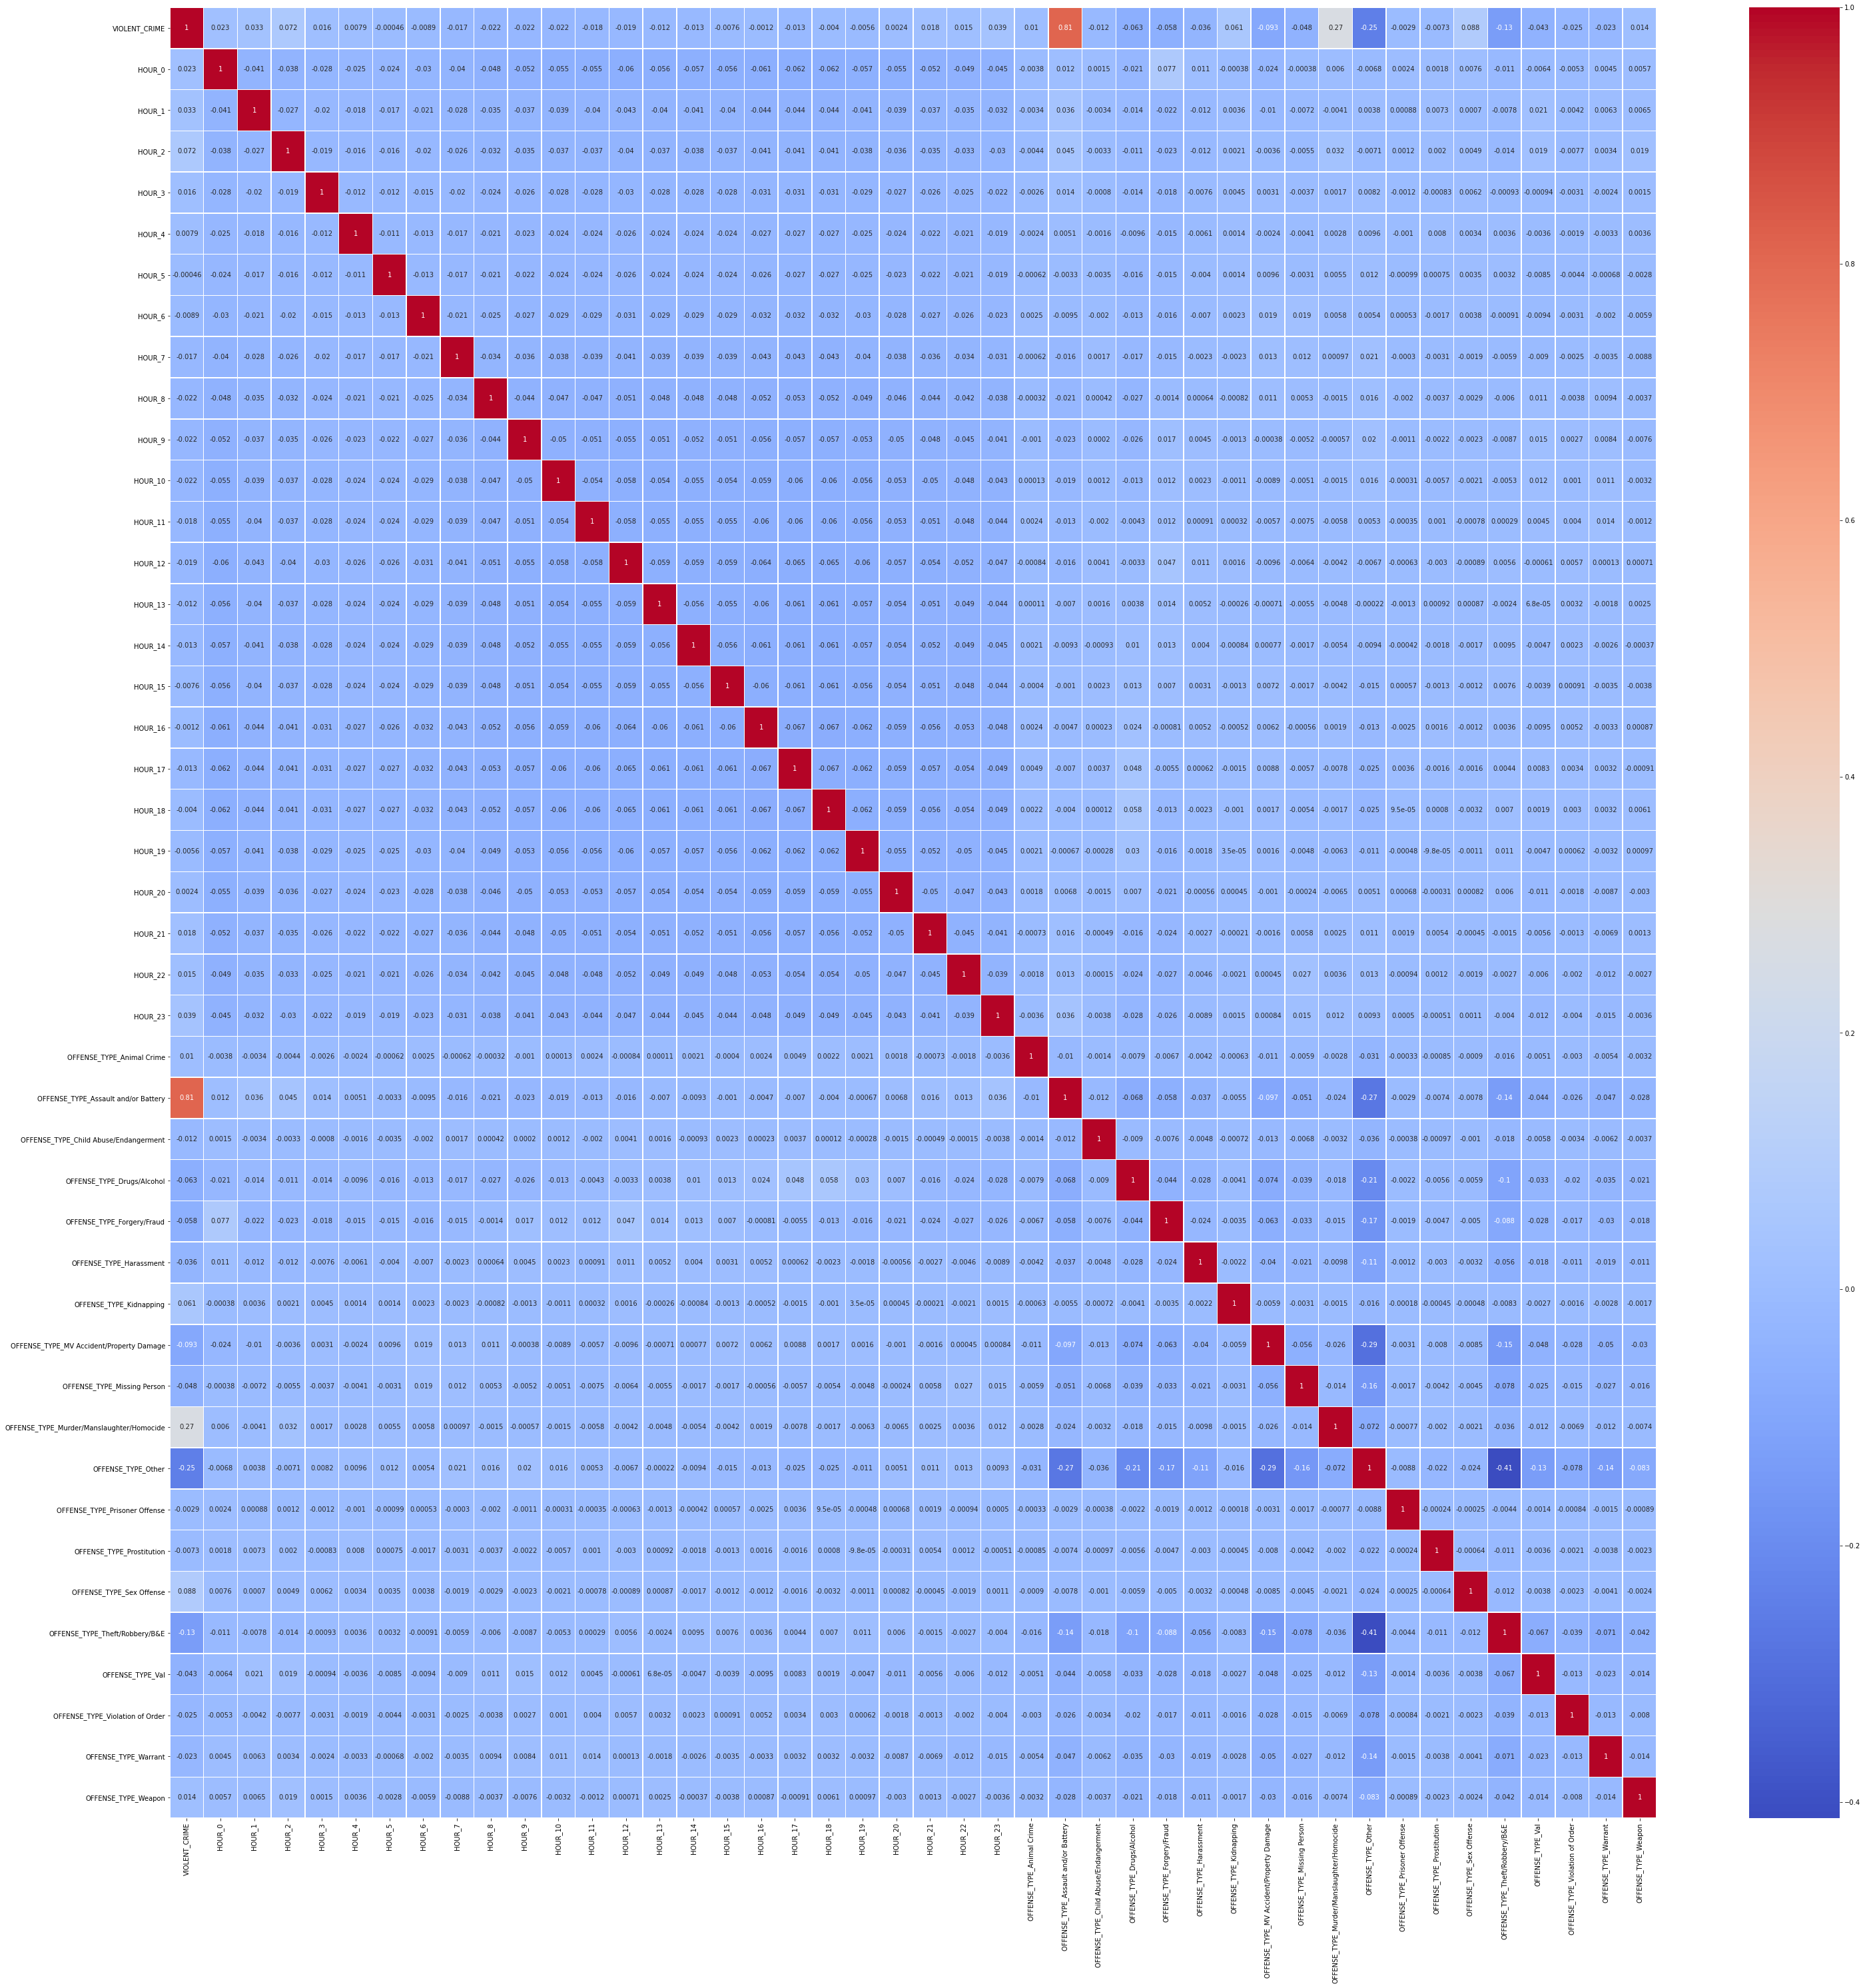

In [10]:
#Focus on Hour of Day / Day of Week for Violent Crime 
demog_category_columns = ["HOUR","OFFENSE_TYPE"]
boston_hour_day_df = boston_crime_data_df[["HOUR","VIOLENT_CRIME","OFFENSE_TYPE"]]
boston_hour_day_dummies_df = pd.get_dummies(boston_hour_day_df, columns=demog_category_columns)
boston_hour_day_corr = boston_hour_day_dummies_df.corr()
fig, ax = plt.subplots(figsize=(50,50)) 
ax = sns.heatmap(boston_hour_day_corr, annot=True, cmap='coolwarm', linewidths=.5)

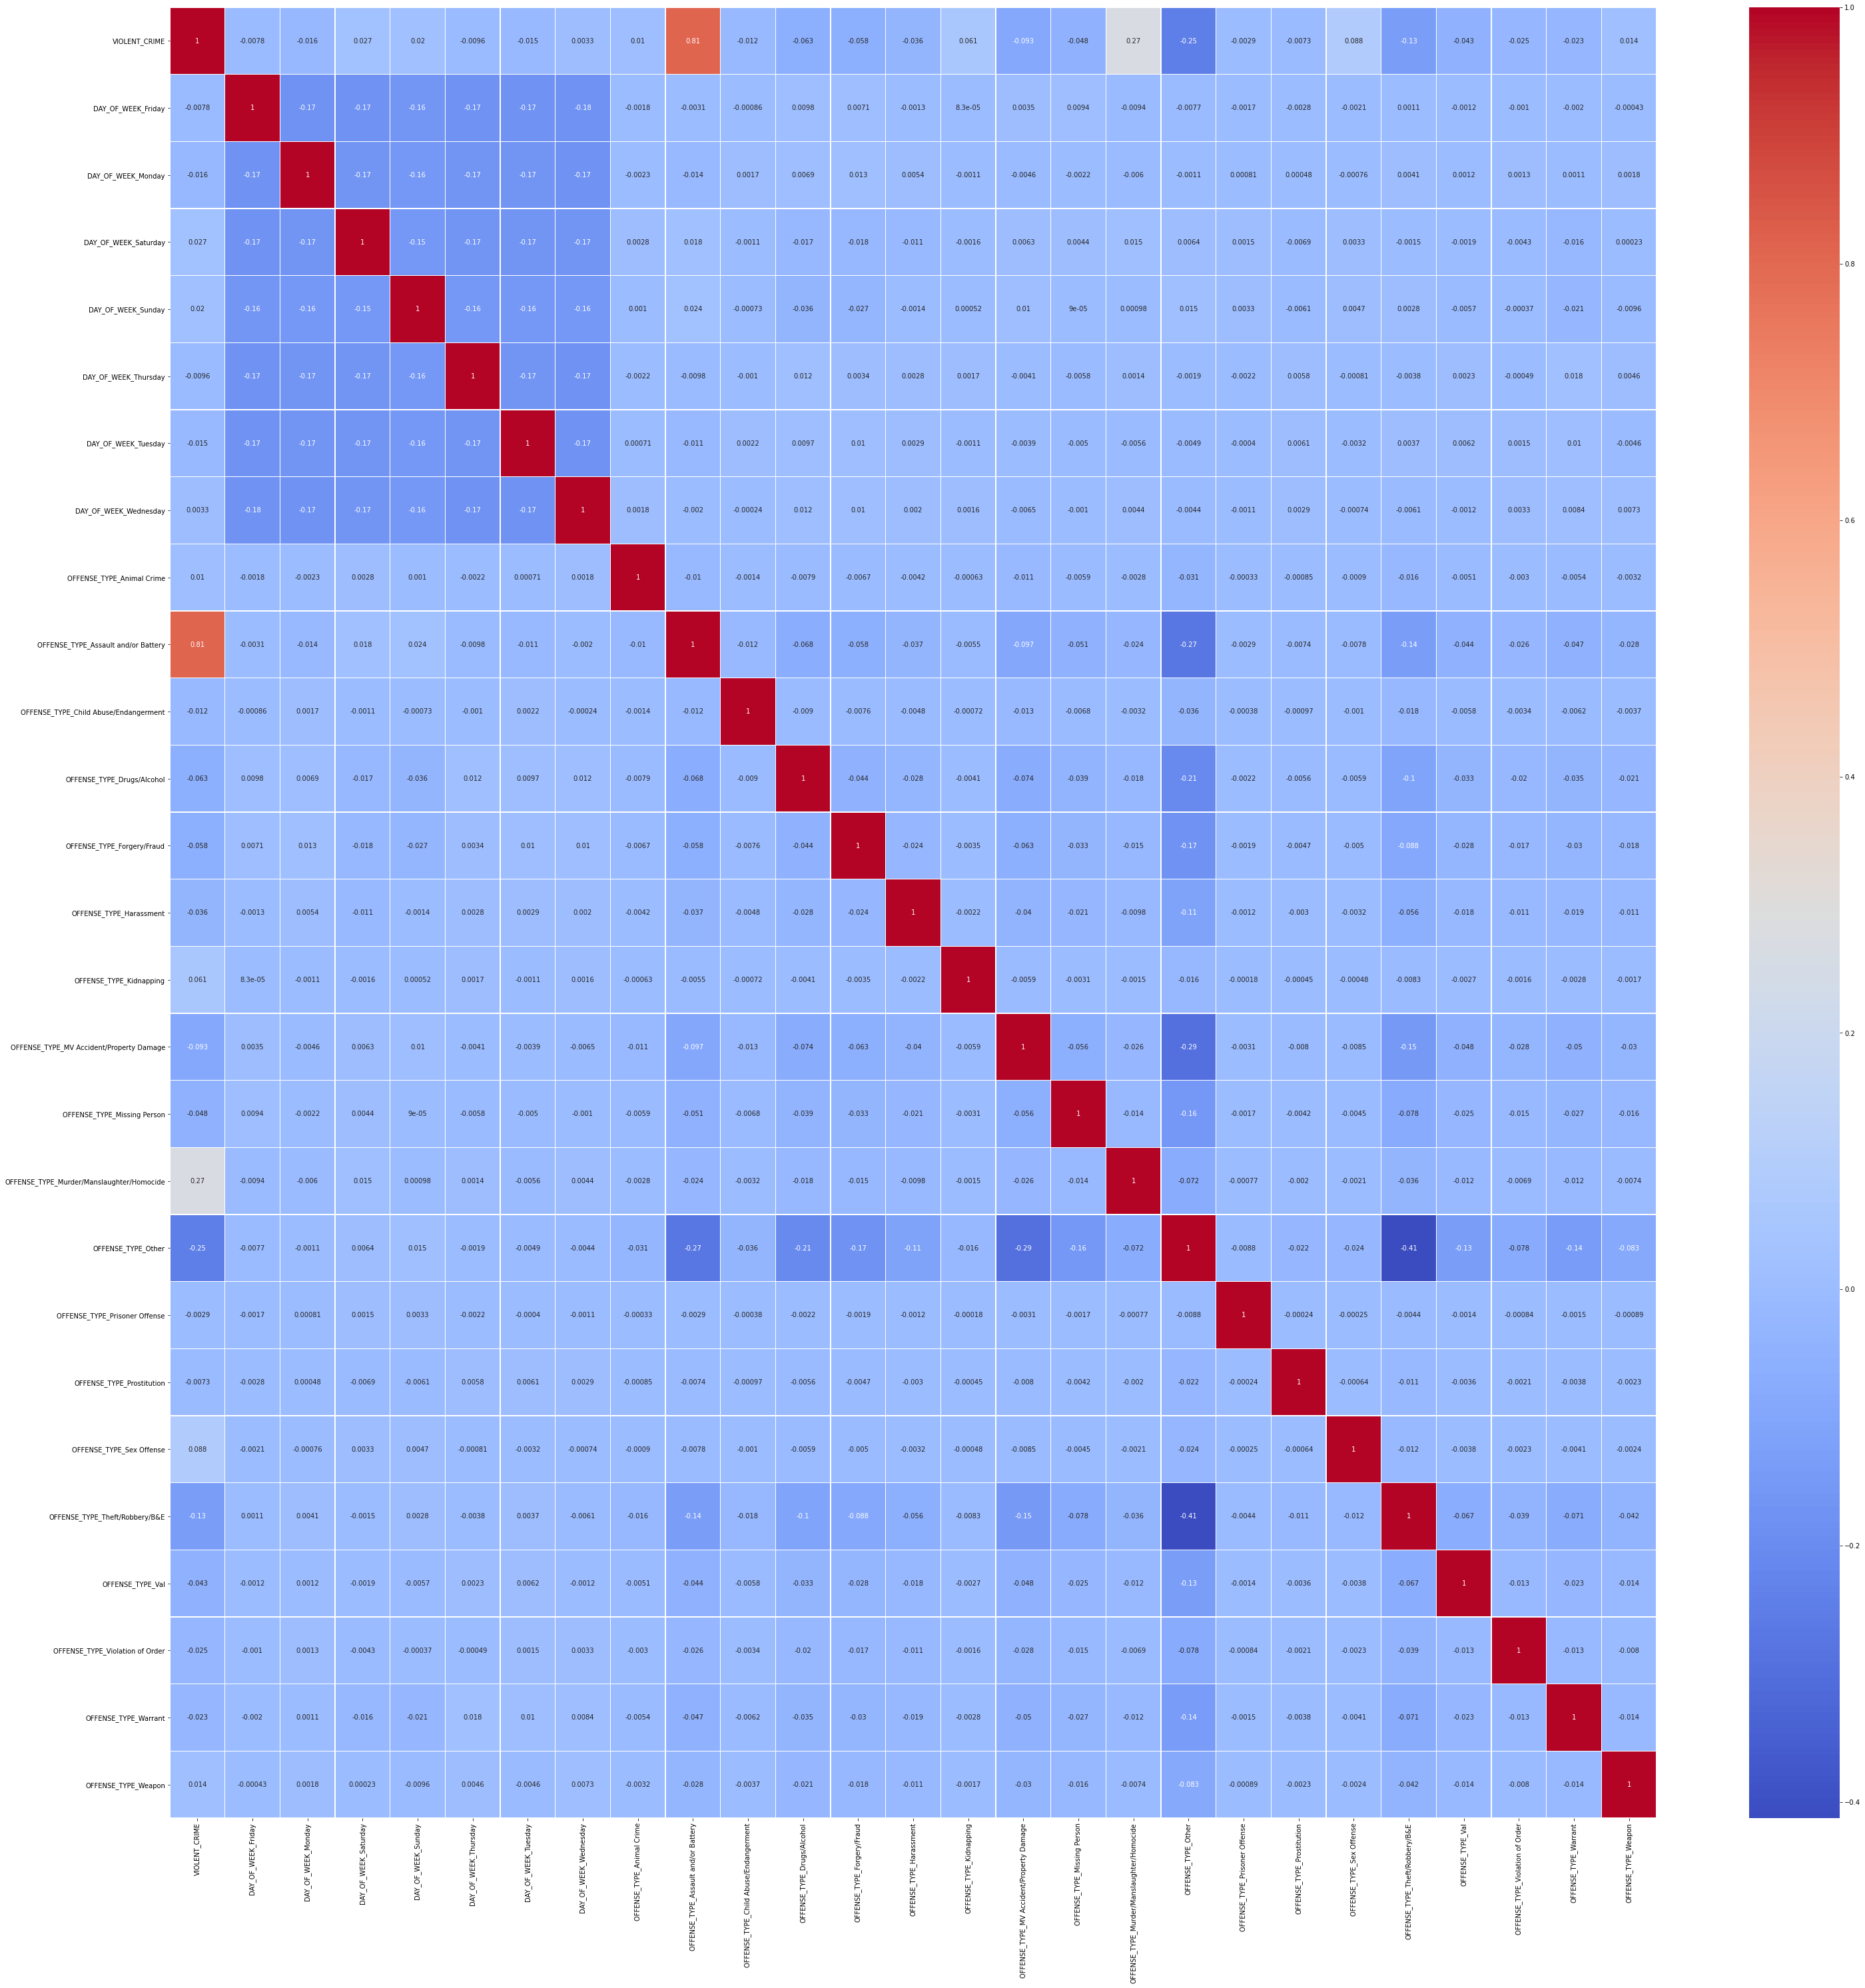

In [11]:
#Focus on Day of Week for Violent Crime 
demog_category_columns = ["DAY_OF_WEEK","OFFENSE_TYPE"]
boston_hour_day_df = boston_crime_data_df[["DAY_OF_WEEK","OFFENSE_TYPE","VIOLENT_CRIME"]]
boston_hour_day_dummies_df = pd.get_dummies(boston_hour_day_df, columns=demog_category_columns)
boston_hour_day_corr = boston_hour_day_dummies_df.corr()
fig, ax = plt.subplots(figsize=(50,50)) 
ax = sns.heatmap(boston_hour_day_corr, annot=True, cmap='coolwarm', linewidths=.5)

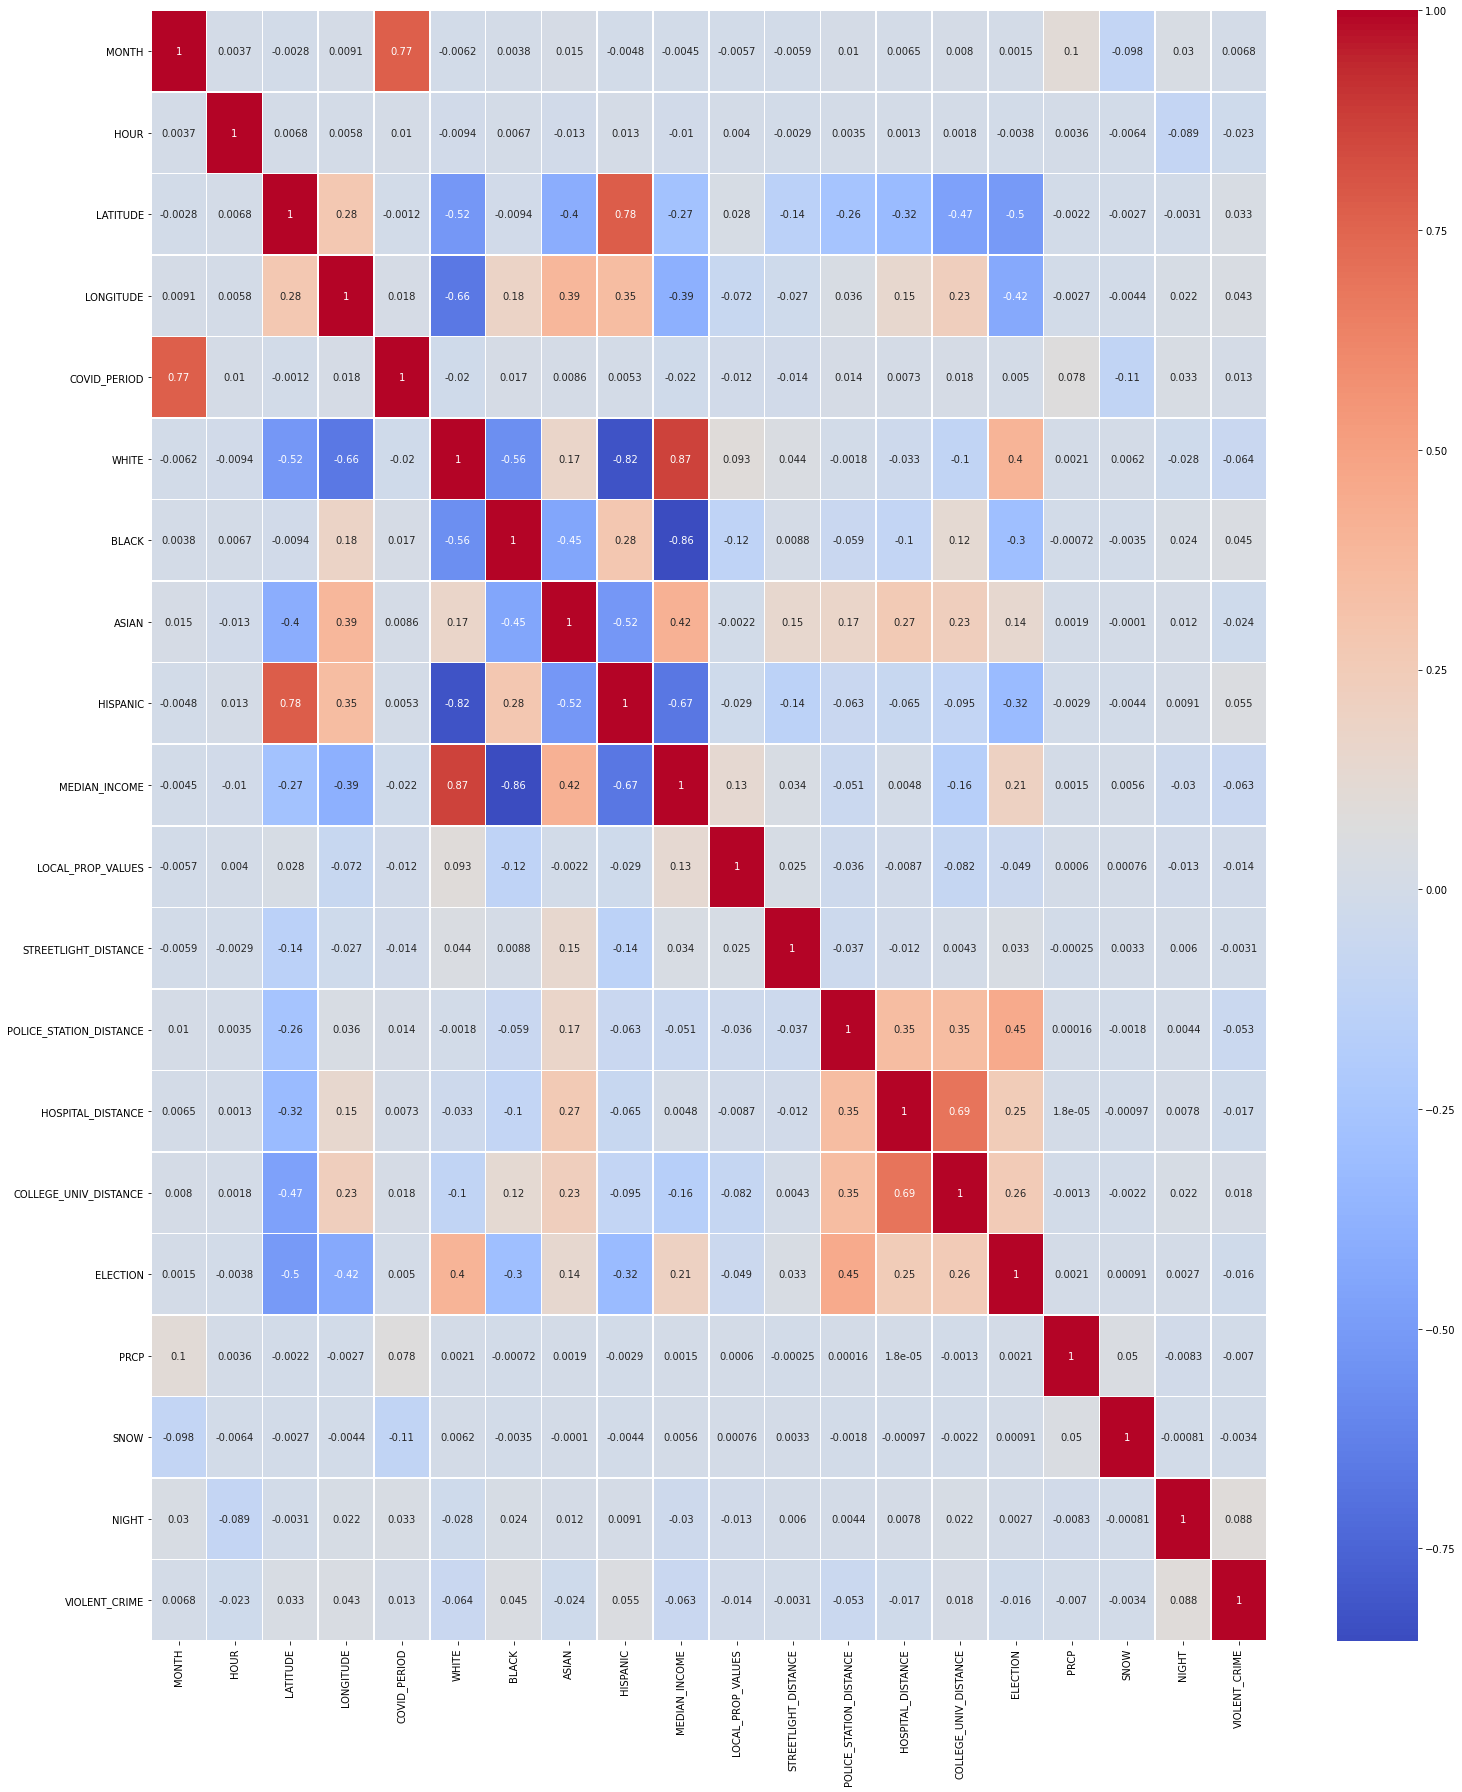

In [12]:
new_york_corr = new_york_crime_data_df.drop(columns=["YEAR"]).corr()
fig, ax = plt.subplots(figsize=(25,30)) 
ax = sns.heatmap(new_york_corr, annot=True, cmap='coolwarm', linewidths=.5)

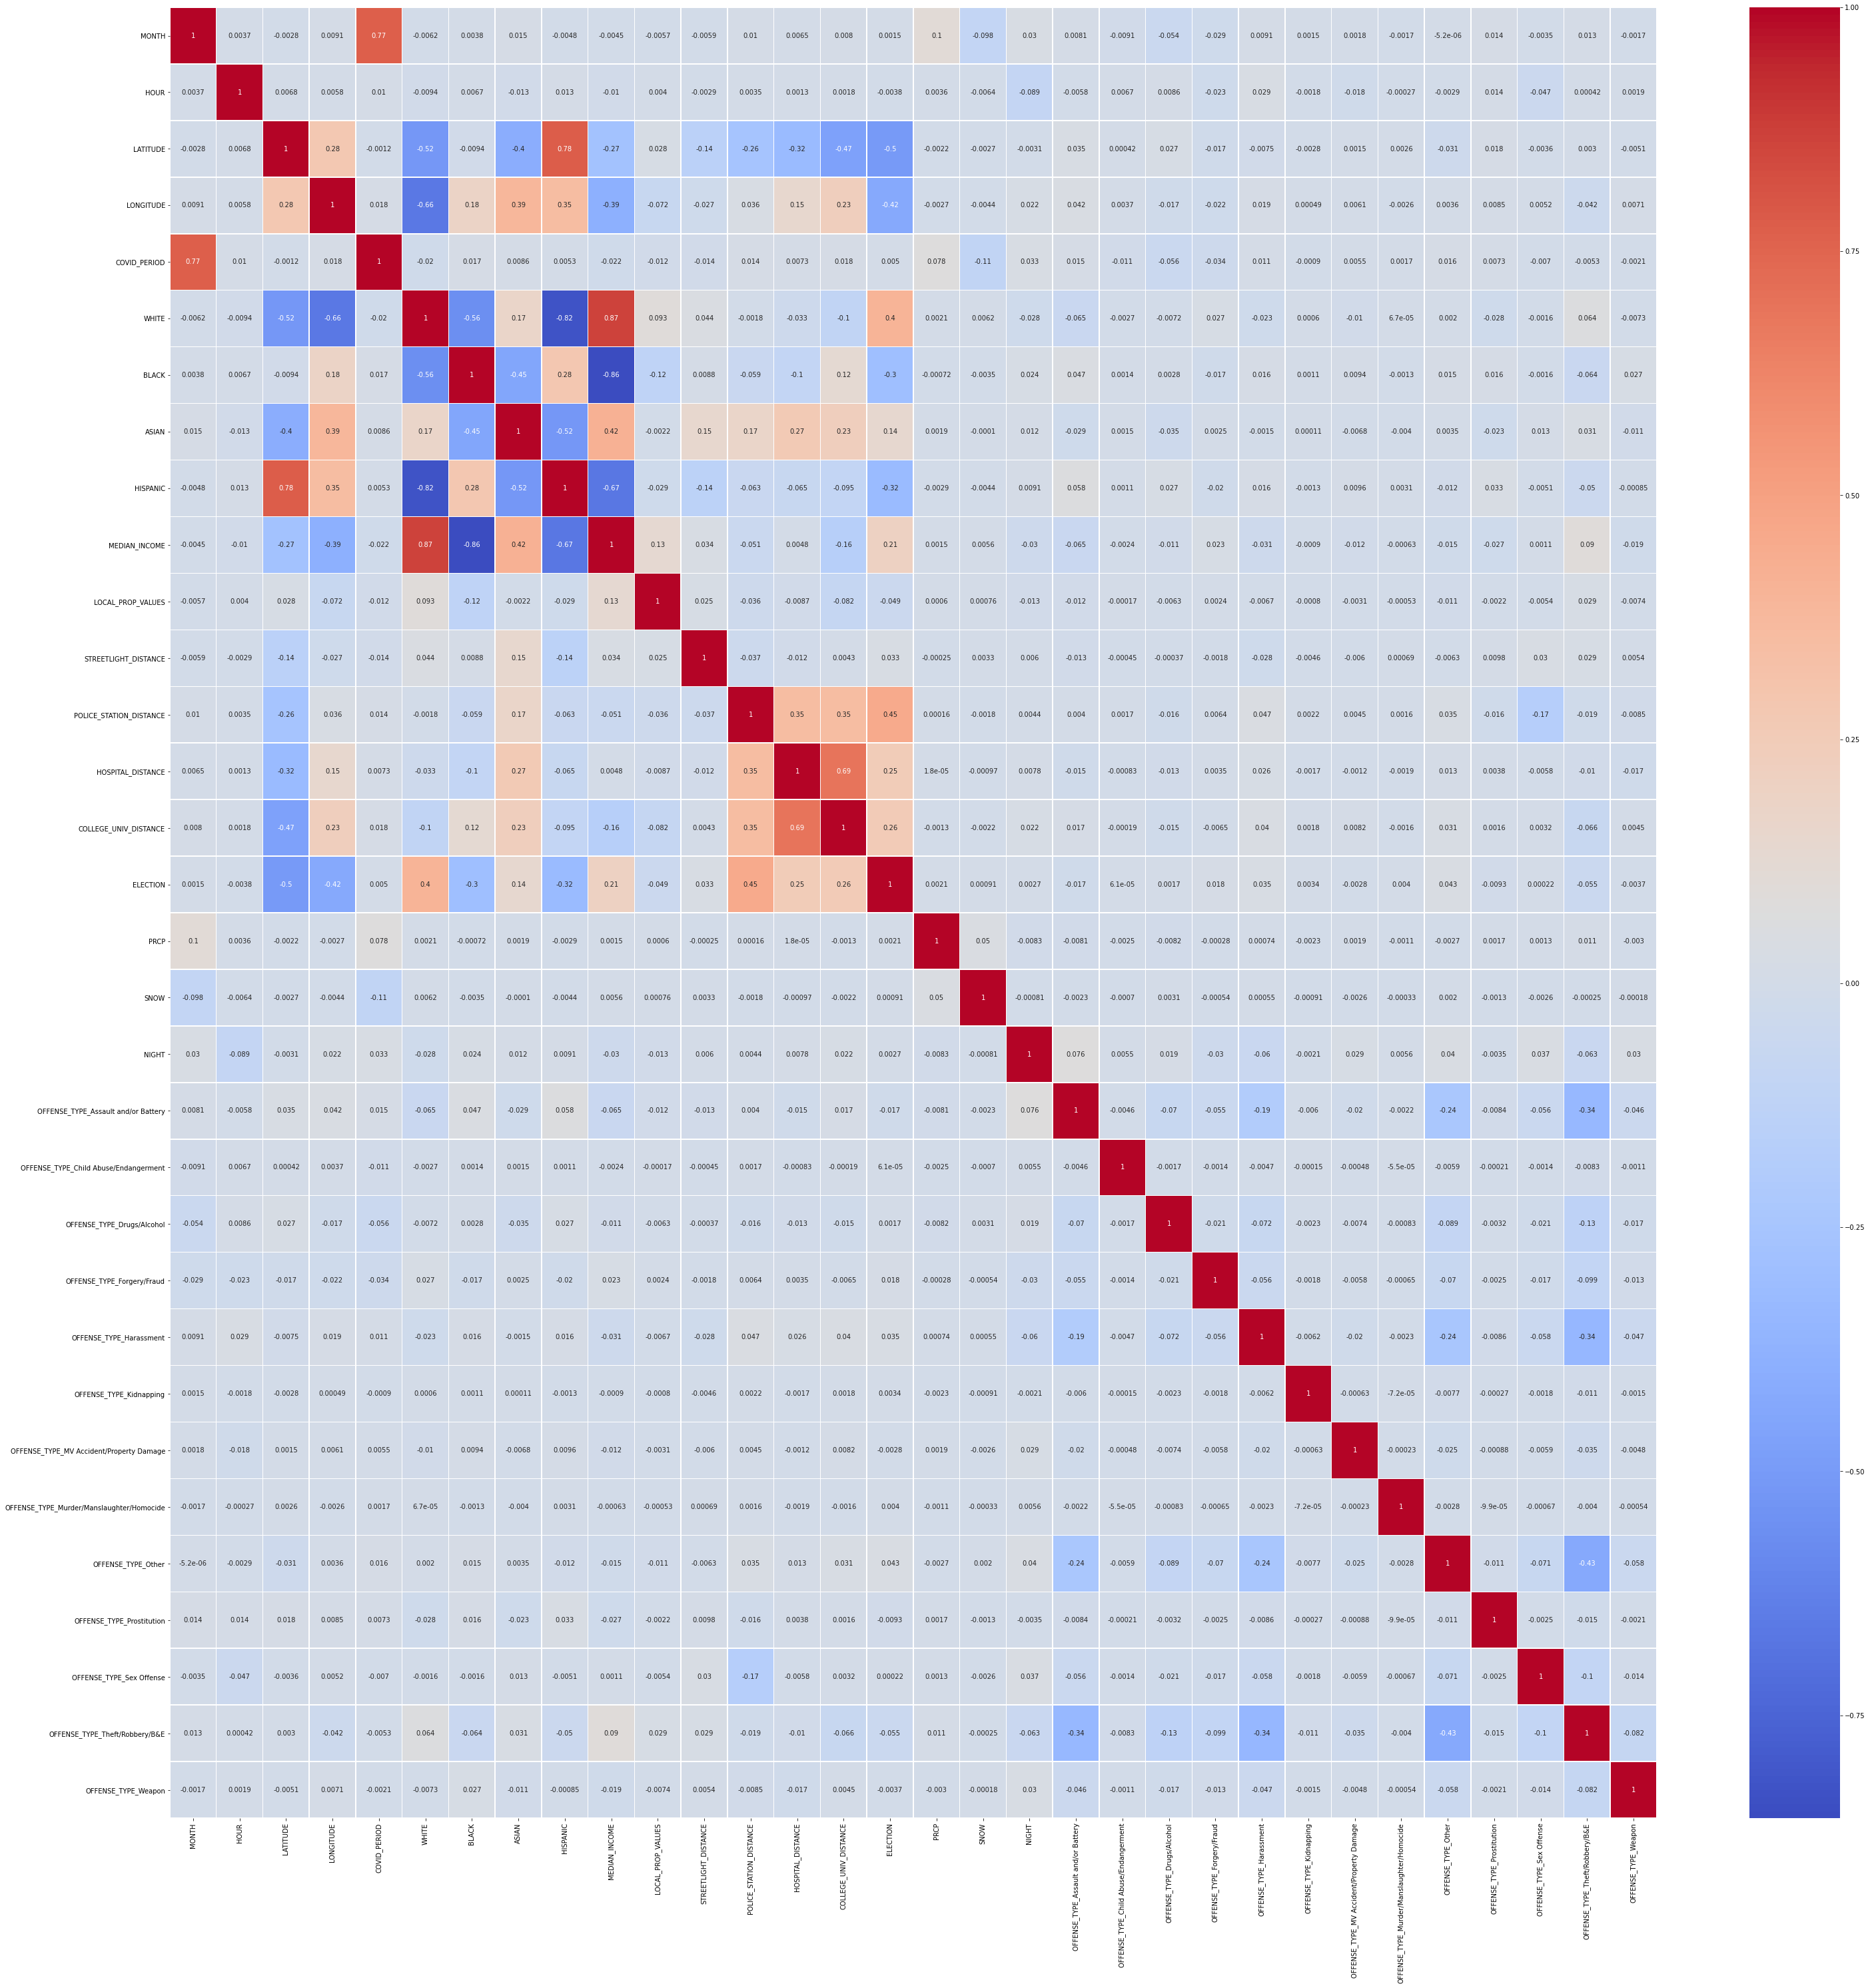

In [13]:
demog_category_columns = ['OFFENSE_TYPE']
new_york_crime_dummies_df = pd.get_dummies(new_york_crime_data_df, columns=demog_category_columns)
#dropping year since there is only one value for it
nyc_corr = new_york_crime_dummies_df.drop(columns=["YEAR","VIOLENT_CRIME"]).corr()
fig, ax = plt.subplots(figsize=(50,50)) 
ax = sns.heatmap(nyc_corr, annot=True, cmap='coolwarm', linewidths=.5)



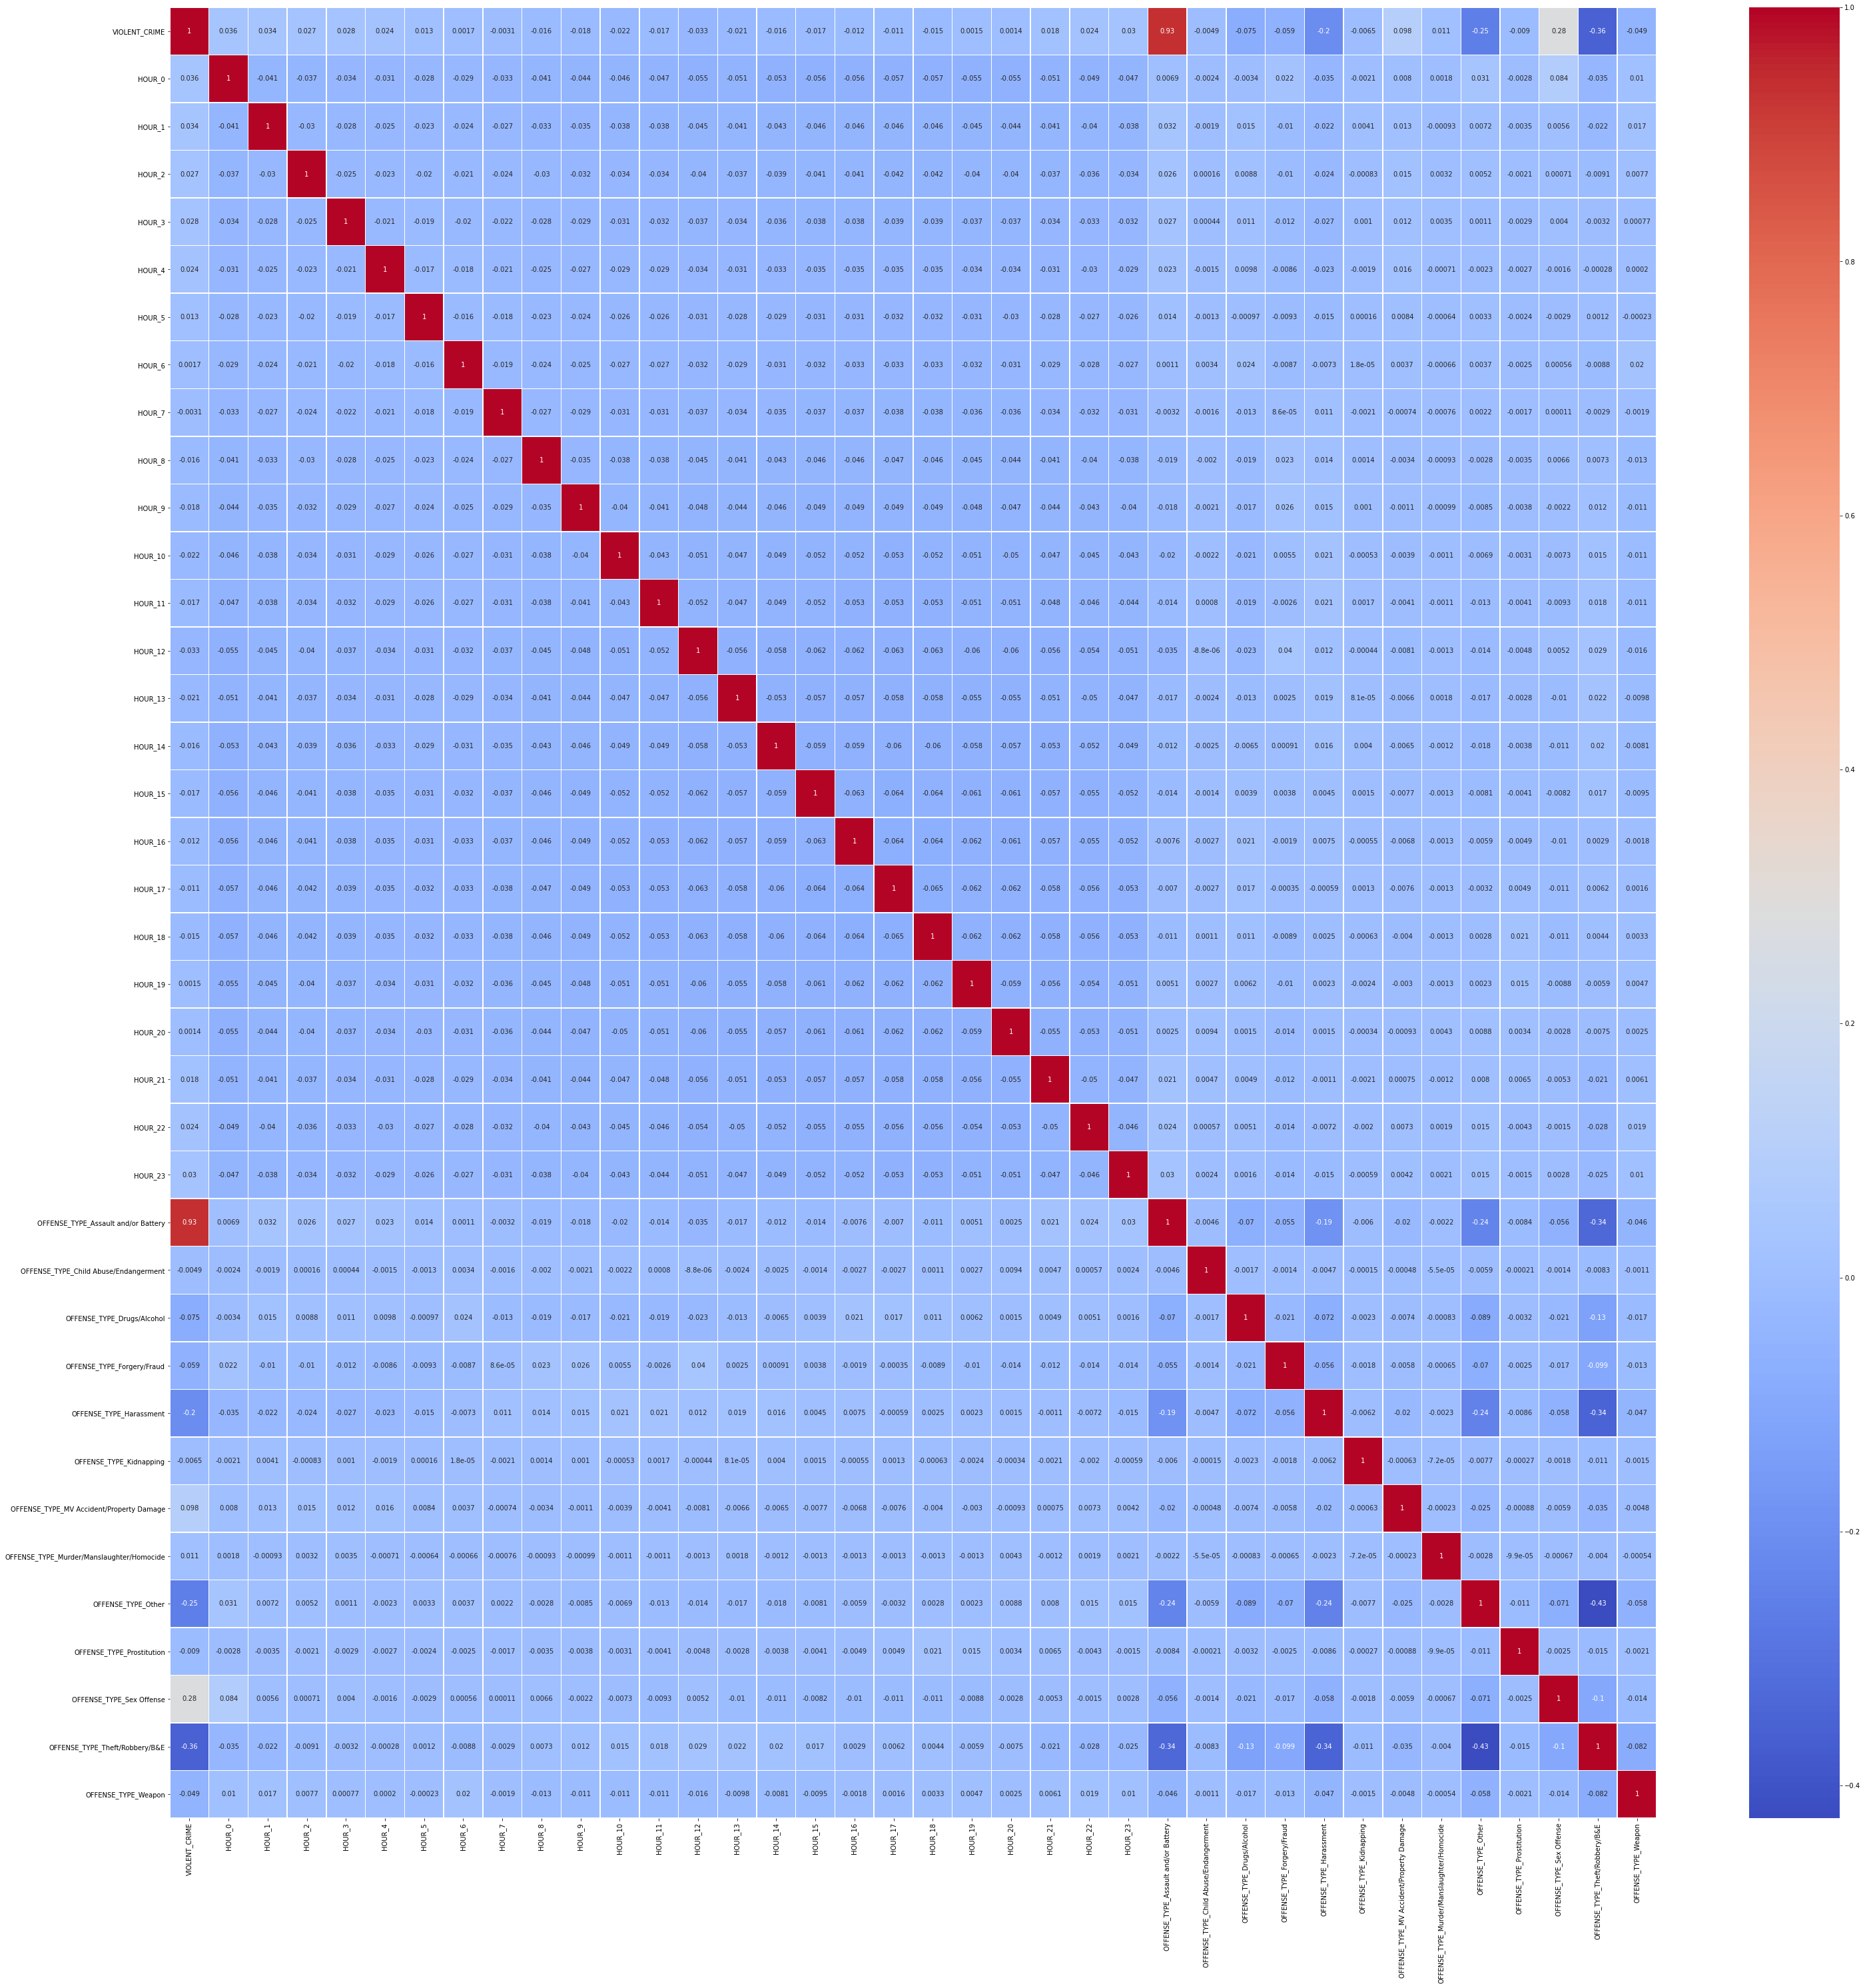

In [14]:
demog_category_columns = ["HOUR","OFFENSE_TYPE"]
new_york_hour_day_df = new_york_crime_data_df[["HOUR","VIOLENT_CRIME","OFFENSE_TYPE"]]
new_york_hour_day_dummies_df = pd.get_dummies(new_york_hour_day_df, columns=demog_category_columns)
nyc_hour_day_corr = new_york_hour_day_dummies_df.corr()
fig, ax = plt.subplots(figsize=(50,50)) 
ax = sns.heatmap(nyc_hour_day_corr, annot=True, cmap='coolwarm', linewidths=.5)

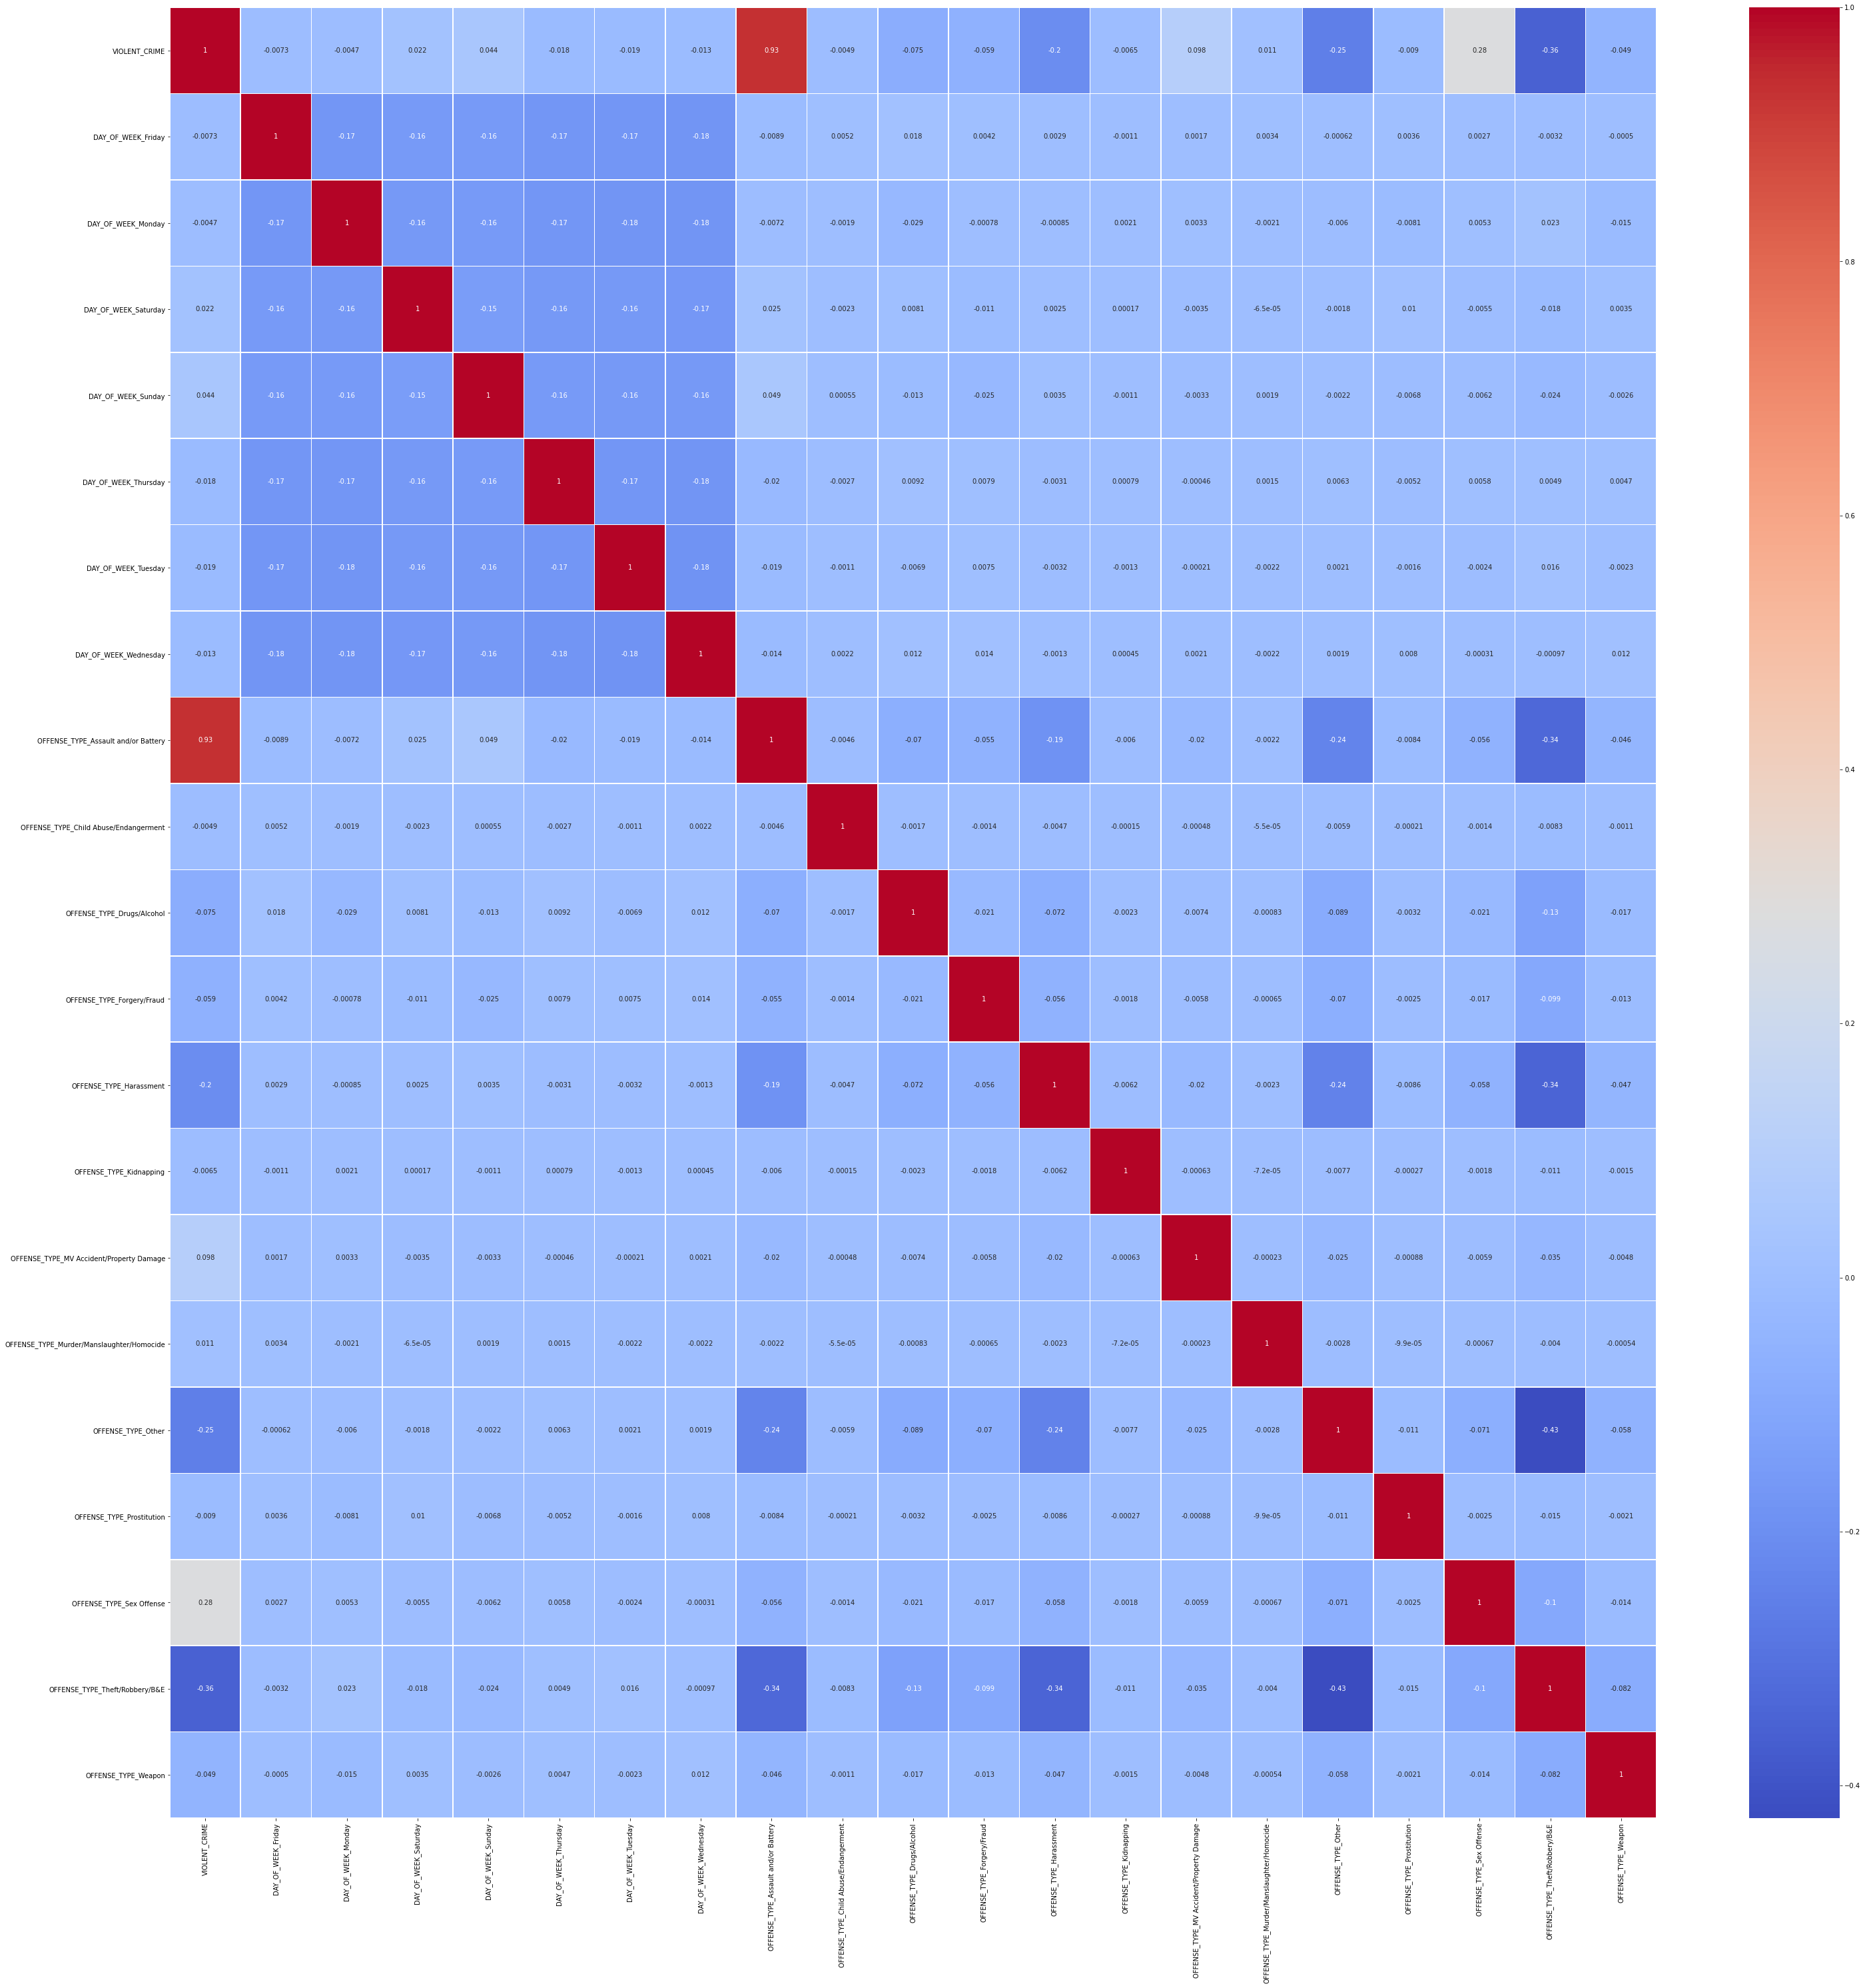

In [15]:
demog_category_columns = ["DAY_OF_WEEK","OFFENSE_TYPE"]
new_york_hour_day_df = new_york_crime_data_df[["DAY_OF_WEEK","VIOLENT_CRIME","OFFENSE_TYPE"]]
new_york_hour_day_dummies_df = pd.get_dummies(new_york_hour_day_df, columns=demog_category_columns)
nyc_hour_day_corr = new_york_hour_day_dummies_df.corr()
fig, ax = plt.subplots(figsize=(50,50)) 
ax = sns.heatmap(nyc_hour_day_corr, annot=True, cmap='coolwarm', linewidths=.5)

**Baseline Model for Predicting Violent Crime**


In [16]:
from sklearn.model_selection import train_test_split
random_state = 109

boston_crime_train, boston_crime_test = train_test_split(boston_crime_data_df, train_size=.8, random_state = random_state)

train_offenses = boston_crime_train['VIOLENT_CRIME'].count()
train_violent_crime = boston_crime_train[boston_crime_train["VIOLENT_CRIME"] == 1]['VIOLENT_CRIME'].sum()
train_proportion_violent = round(train_violent_crime/train_offenses, 3)
train_accuracy = round(1 - train_proportion_violent,3)

test_offenses = boston_crime_test['VIOLENT_CRIME'].count()
test_violent_crime = boston_crime_test[boston_crime_test["VIOLENT_CRIME"] == 1]['VIOLENT_CRIME'].sum()
test_proportion_violent = round(test_violent_crime/test_offenses, 3)
test_accuracy = round(1 - test_proportion_violent,3)

print(f"Proportion of violent crime (Boston): {train_proportion_violent}")
print(f"Naive Model Train Accuracy when classifying all offenses as not violent: {train_accuracy}")
print(f"Naive Model Test Accuracy when classifying all offenses as not violent: {test_accuracy}")


Proportion of violent crime (Boston): 0.082
Naive Model Train Accuracy when classifying all offenses as not violent: 0.918
Naive Model Test Accuracy when classifying all offenses as not violent: 0.918


In [17]:
nyc_crime_train, nyc_crime_test = train_test_split(new_york_crime_data_df, train_size=.8, random_state = random_state)

train_offenses = nyc_crime_train['VIOLENT_CRIME'].count()
train_violent_crime = nyc_crime_train[nyc_crime_train["VIOLENT_CRIME"] == 1]['VIOLENT_CRIME'].sum()
train_proportion_violent = round(train_violent_crime/train_offenses, 3)
train_accuracy = round(1 - train_proportion_violent,3)

test_offenses = nyc_crime_test['VIOLENT_CRIME'].count()
test_violent_crime = nyc_crime_test[nyc_crime_test["VIOLENT_CRIME"] == 1]['VIOLENT_CRIME'].sum()
test_proportion_violent = round(test_violent_crime/test_offenses, 3)
test_accuracy = round(1 - test_proportion_violent,3)

print(f"Proportion of violent crime (NYC) : {train_proportion_violent}")
print(f"Naive Model Train Accuracy when classifying all offenses as not violent: {train_accuracy}")
print(f"Naive Model Test Accuracy when classifying all offenses as not violent: {test_accuracy}")

Proportion of violent crime (NYC) : 0.176
Naive Model Train Accuracy when classifying all offenses as not violent: 0.824
Naive Model Test Accuracy when classifying all offenses as not violent: 0.824


In [18]:
combined_crime_data_df = pd.concat([boston_crime_data_df, new_york_crime_data_df])
comb_crime_train, comb_crime_test = train_test_split(combined_crime_data_df, train_size=.8, random_state = random_state)

train_offenses = comb_crime_train['VIOLENT_CRIME'].count()
train_violent_crime = comb_crime_train[comb_crime_train["VIOLENT_CRIME"] == 1]['VIOLENT_CRIME'].sum()
train_proportion_violent = round(train_violent_crime/train_offenses, 3)
train_accuracy = round(1 - train_proportion_violent,3)

test_offenses = comb_crime_test['VIOLENT_CRIME'].count()
test_violent_crime = comb_crime_test[comb_crime_test["VIOLENT_CRIME"] == 1]['VIOLENT_CRIME'].sum()
test_proportion_violent = round(test_violent_crime/test_offenses, 3)
test_accuracy = round(1 - test_proportion_violent,3)

print(f"Proportion of violent crime (Combined) : {train_proportion_violent}")
print(f"Naive Model Train Accuracy when classifying all offenses as not violent: {train_accuracy}")
print(f"Naive Model Test Accuracy when classifying all offenses as not violent: {test_accuracy}")

Proportion of violent crime (Combined) : 0.118
Naive Model Train Accuracy when classifying all offenses as not violent: 0.882
Naive Model Test Accuracy when classifying all offenses as not violent: 0.882


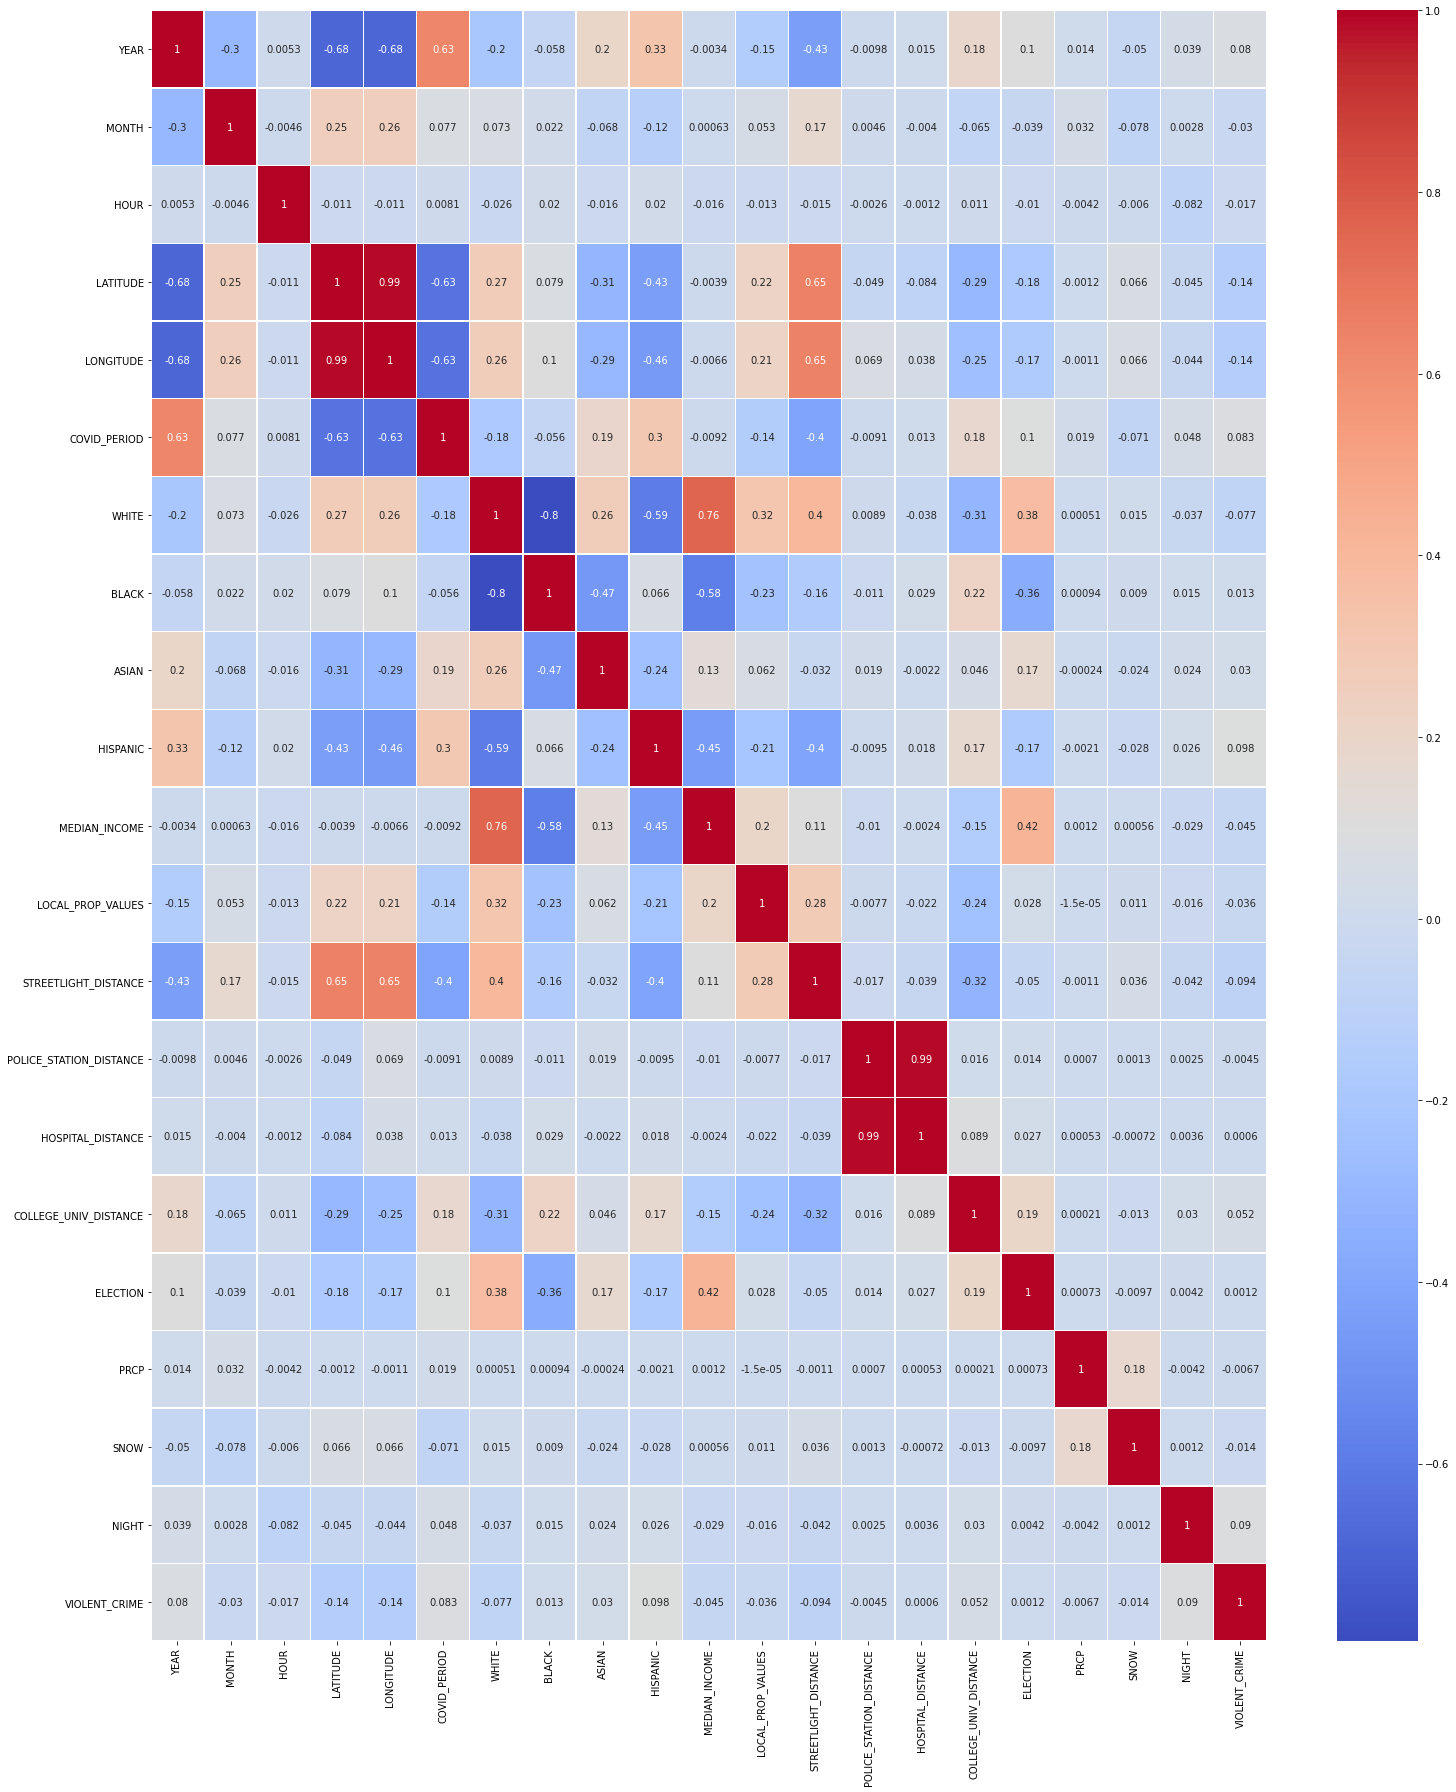

In [19]:
comb_corr = combined_crime_data_df.corr()
fig, ax = plt.subplots(figsize=(25,30)) 
ax = sns.heatmap(comb_corr, annot=True, cmap='coolwarm', linewidths=.5)

In [20]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression

# we'll evaluate for violent crime in Boston using all features (minus the other response variable for Offense Type)
demog_category_columns = ['AREA', 'YEAR', 'MONTH', 'DAY_OF_WEEK', 'HOUR']
train_crime_demog_dummies_df = pd.get_dummies(boston_crime_train.drop(columns=["OFFENSE_TYPE"]), columns=demog_category_columns)
test_crime_demog_dummies_df = pd.get_dummies(boston_crime_test.drop(columns=["OFFENSE_TYPE"]), columns=demog_category_columns)

# select all columns from dummies minus response and Geohash 
x_columns = train_crime_demog_dummies_df.drop(columns=["VIOLENT_CRIME","GEOHASH"]).columns

X_train = train_crime_demog_dummies_df[x_columns]
X_test = test_crime_demog_dummies_df[x_columns]

demog_scaler = MinMaxScaler()
demog_scaler.fit(X_train)
x_train_norm = demog_scaler.transform(X_train)
x_test_norm = demog_scaler.transform(X_test)

y_train = train_crime_demog_dummies_df['VIOLENT_CRIME'].values
y_test = test_crime_demog_dummies_df['VIOLENT_CRIME'].values

# attempt a baseline logistic regression without regularization
demog_logit_full = LogisticRegression(penalty='none', max_iter = 10000)
demog_logit_full.fit(x_train_norm,y_train)
demog_logit_full_train_accuracy = round(demog_logit_full.score(x_train_norm, y_train),3)
demog_logit_full_test_accuracy = round(demog_logit_full.score(x_test_norm, y_test),3)

b0 = round(demog_logit_full.intercept_[0],3)
print(f"Logistic Regression Estimated Betas (B0): {b0}")

for i, k in enumerate(x_columns):
    print(f"Logistic Regression Estimated Beta {k} (B{i + 1}): { round(demog_logit_full.coef_[0][i],3)}")

print(f"\nLogisitic Train Accuracy: {demog_logit_full_train_accuracy}, Logistic Test Accuracy: {demog_logit_full_test_accuracy}")

Logistic Regression Estimated Betas (B0): -0.869
Logistic Regression Estimated Beta LATITUDE (B1): -0.868
Logistic Regression Estimated Beta LONGITUDE (B2): -0.009
Logistic Regression Estimated Beta COVID_PERIOD (B3): 0.099
Logistic Regression Estimated Beta WHITE (B4): -0.366
Logistic Regression Estimated Beta BLACK (B5): -0.334
Logistic Regression Estimated Beta ASIAN (B6): -0.161
Logistic Regression Estimated Beta HISPANIC (B7): -0.292
Logistic Regression Estimated Beta MEDIAN_INCOME (B8): -0.293
Logistic Regression Estimated Beta LOCAL_PROP_VALUES (B9): 0.055
Logistic Regression Estimated Beta STREETLIGHT_DISTANCE (B10): -0.168
Logistic Regression Estimated Beta POLICE_STATION_DISTANCE (B11): -0.006
Logistic Regression Estimated Beta HOSPITAL_DISTANCE (B12): -0.01
Logistic Regression Estimated Beta COLLEGE_UNIV_DISTANCE (B13): 0.556
Logistic Regression Estimated Beta ELECTION (B14): -0.205
Logistic Regression Estimated Beta PRCP (B15): -0.194
Logistic Regression Estimated Beta SNOW

In [21]:
from sklearn.linear_model import LogisticRegressionCV
c_list = [1e-3,1e-2,1e-1,1e0,1e1,1e2,1e3]
folds = 3
training_score = []

logit_lasso= LogisticRegressionCV(Cs=c_list, penalty='l2',solver='liblinear', max_iter = 1000, scoring='accuracy',cv=folds)
logit_lasso.fit(x_train_norm, y_train)
logit_lasso_score_train = logit_lasso.score(x_train_norm, y_train)
logit_lasso_score_test = logit_lasso.score(x_test_norm, y_test)


In [22]:
print(
    "The regularization parameter C chosen by this model: {}\n"
    "Training Accuracy: {:.3f}\n"
    "Test Accuracy: {:.3f}\n"
    .format(logit_lasso.C_[0], logit_lasso_score_train, logit_lasso_score_test)
)

The regularization parameter C chosen by this model: 0.001
Training Accuracy: 0.918
Test Accuracy: 0.918



In [26]:
# Let's give adaboost a shot
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

def adaboost(depth, num_estimators, learning_rate):
    boost = AdaBoostClassifier( base_estimator = DecisionTreeClassifier(max_depth = depth), n_estimators=num_estimators, learning_rate=learning_rate)
    boost.fit(X_train, y_train)
    train_staged_score = list(boost.staged_score(X_train, y_train))
    test_staged_score = list(boost.staged_score(X_test, y_test))
    return train_staged_score, test_staged_score


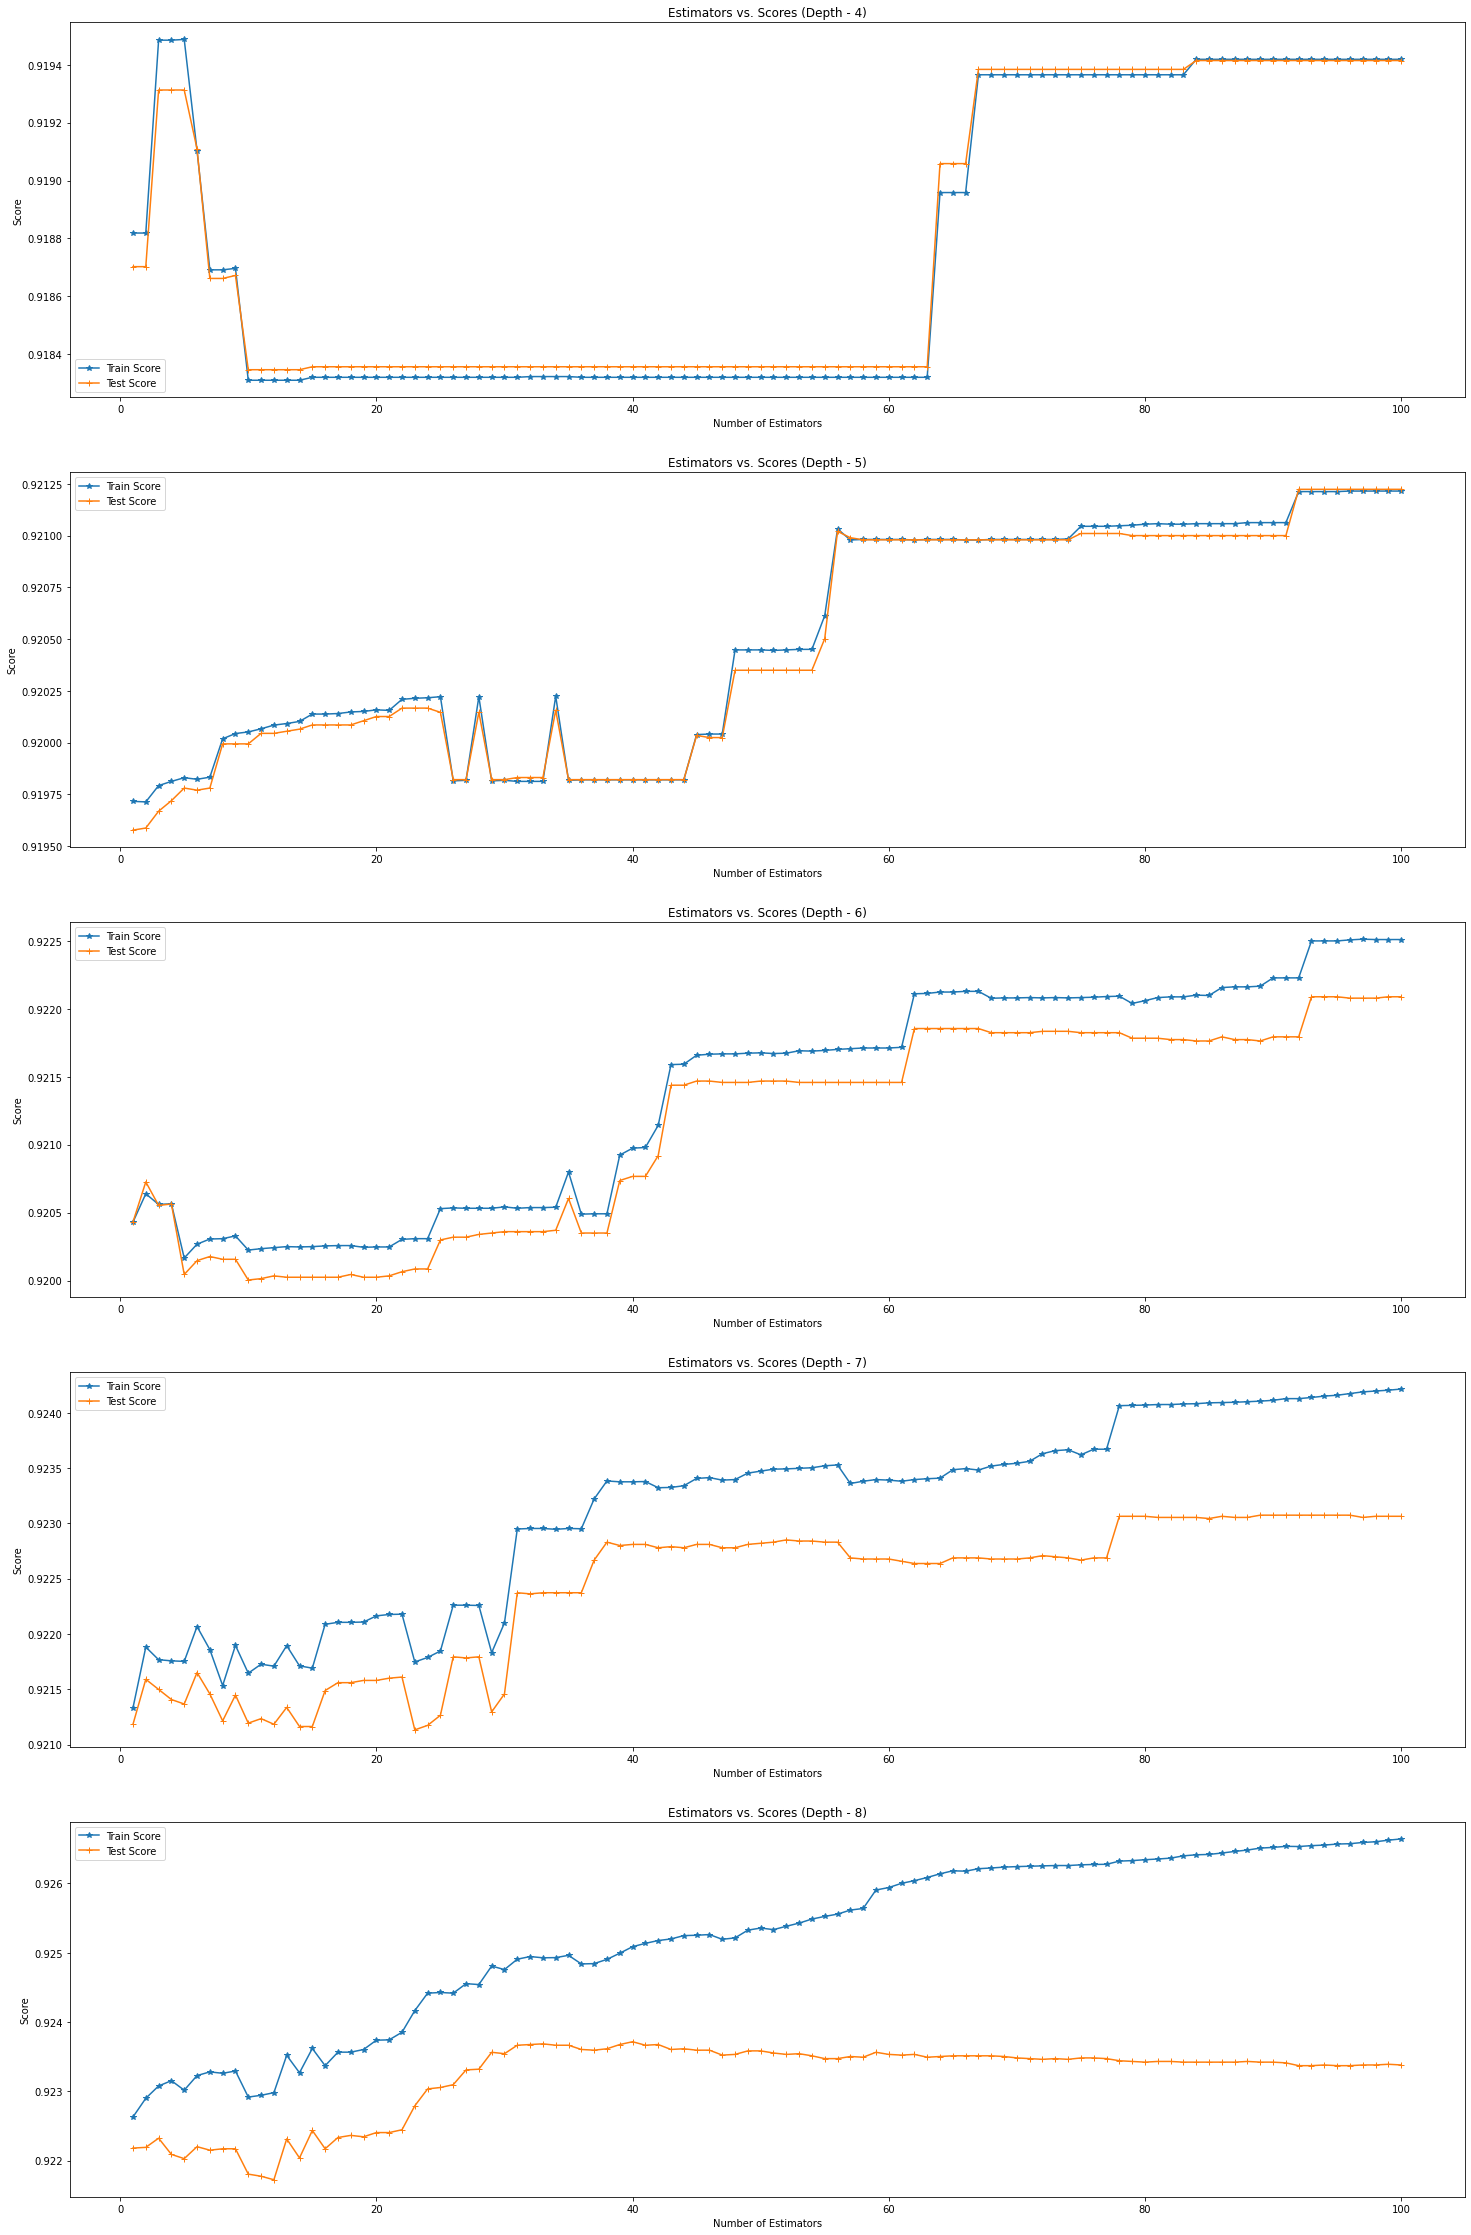

In [35]:
depths = [4,5,6,7,8]
n_estimators = 100
learning_rate = .05
num_estimators = range(1, 101)
fig, axs = plt.subplots(nrows=len(depths),ncols=1,figsize=(25,40))
score_gap = []
best_score = []
best_iteration = []

for i, depth in enumerate(depths):
    train, test = adaboost(depth,n_estimators,learning_rate)
    max_idx = np.argmax(test)
    best_score.append(test[max_idx])
    best_iteration.append(max_idx)
    score_gap.append(np.abs(train[max_idx] - test[max_idx]))
    axs[i].plot(num_estimators, train, '*-', label="Train Score")
    axs[i].plot(num_estimators, test, '-+', label="Test Score")
    axs[i].legend()
    axs[i].set_title(f"Estimators vs. Scores (Depth - {depth})")
    axs[i].set_ylabel("Score")
    axs[i].set_xlabel("Number of Estimators")  

In [36]:
boost_depth_performance = {'depths': depths, 'best test score': best_score, 'train-test delta':score_gap, 'iteration': best_iteration}
pd.DataFrame.from_dict(boost_depth_performance).set_index('depths')

best test score  train-test delta  iteration
depths                                              
4              0.919414          0.000004         83
5              0.921224          0.000011         91
6              0.922088          0.000411         92
7              0.923075          0.001031         88
8              0.923715          0.001372         39

In [39]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression

# we'll now evaluate for violent crime in using both cities using all features (minus the other response variable for Offense Type)
demog_category_columns = ['YEAR', 'MONTH', 'DAY_OF_WEEK', 'HOUR']
train_crime_demog_dummies_df = pd.get_dummies(comb_crime_train.drop(columns=["OFFENSE_TYPE"]), columns=demog_category_columns)
test_crime_demog_dummies_df = pd.get_dummies(comb_crime_test.drop(columns=["OFFENSE_TYPE"]), columns=demog_category_columns)

# select all columns from dummies minus response, Geohash, Latitude, Longitude 
x_columns = train_crime_demog_dummies_df.drop(columns=["VIOLENT_CRIME","GEOHASH","LATITUDE","LONGITUDE","AREA"]).columns

X_train = train_crime_demog_dummies_df[x_columns]
X_test = test_crime_demog_dummies_df[x_columns]

demog_scaler = MinMaxScaler()
demog_scaler.fit(X_train)
x_train_norm = demog_scaler.transform(X_train)
x_test_norm = demog_scaler.transform(X_test)

y_train = train_crime_demog_dummies_df['VIOLENT_CRIME'].values
y_test = test_crime_demog_dummies_df['VIOLENT_CRIME'].values

# attempt a baseline logistic regression without regularization
demog_logit_full = LogisticRegression(penalty='none', max_iter = 10000)
demog_logit_full.fit(x_train_norm,y_train)
demog_logit_full_train_accuracy = round(demog_logit_full.score(x_train_norm, y_train),3)
demog_logit_full_test_accuracy = round(demog_logit_full.score(x_test_norm, y_test),3)

b0 = round(demog_logit_full.intercept_[0],3)
print(f"Logistic Regression Estimated Betas (B0): {b0}")

for i, k in enumerate(x_columns):
    print(f"Logistic Regression Estimated Beta {k} (B{i + 1}): { round(demog_logit_full.coef_[0][i],3)}")

print(f"\nLogisitic Train Accuracy: {demog_logit_full_train_accuracy}, Logistic Test Accuracy: {demog_logit_full_test_accuracy}")

Logistic Regression Estimated Betas (B0): -18.069
Logistic Regression Estimated Beta COVID_PERIOD (B1): -0.041
Logistic Regression Estimated Beta WHITE (B2): 21.137
Logistic Regression Estimated Beta BLACK (B3): 21.575
Logistic Regression Estimated Beta ASIAN (B4): 8.428
Logistic Regression Estimated Beta HISPANIC (B5): 15.792
Logistic Regression Estimated Beta MEDIAN_INCOME (B6): 0.198
Logistic Regression Estimated Beta LOCAL_PROP_VALUES (B7): -12.658
Logistic Regression Estimated Beta STREETLIGHT_DISTANCE (B8): -0.931
Logistic Regression Estimated Beta POLICE_STATION_DISTANCE (B9): -4.692
Logistic Regression Estimated Beta HOSPITAL_DISTANCE (B10): -4.356
Logistic Regression Estimated Beta COLLEGE_UNIV_DISTANCE (B11): 0.238
Logistic Regression Estimated Beta ELECTION (B12): 0.067
Logistic Regression Estimated Beta PRCP (B13): -0.07
Logistic Regression Estimated Beta SNOW (B14): -0.8
Logistic Regression Estimated Beta NIGHT (B15): -0.648
Logistic Regression Estimated Beta YEAR_2015 (B1

In [40]:
from sklearn.linear_model import LogisticRegressionCV
c_list = [1e-3,1e-2,1e-1,1e0,1e1,1e2,1e3]
folds = 3
training_score = []

logit_lasso= LogisticRegressionCV(Cs=c_list, penalty='l2',solver='liblinear', max_iter = 1000, scoring='accuracy',cv=folds)
logit_lasso.fit(x_train_norm, y_train)
logit_lasso_score_train = logit_lasso.score(x_train_norm, y_train)
logit_lasso_score_test = logit_lasso.score(x_test_norm, y_test)

In [41]:
print(
    "The regularization parameter C chosen by this model: {}\n"
    "Training Accuracy: {:.3f}\n"
    "Test Accuracy: {:.3f}\n"
    .format(logit_lasso.C_[0], logit_lasso_score_train, logit_lasso_score_test)
)

The regularization parameter C chosen by this model: 0.001
Training Accuracy: 0.882
Test Accuracy: 0.882



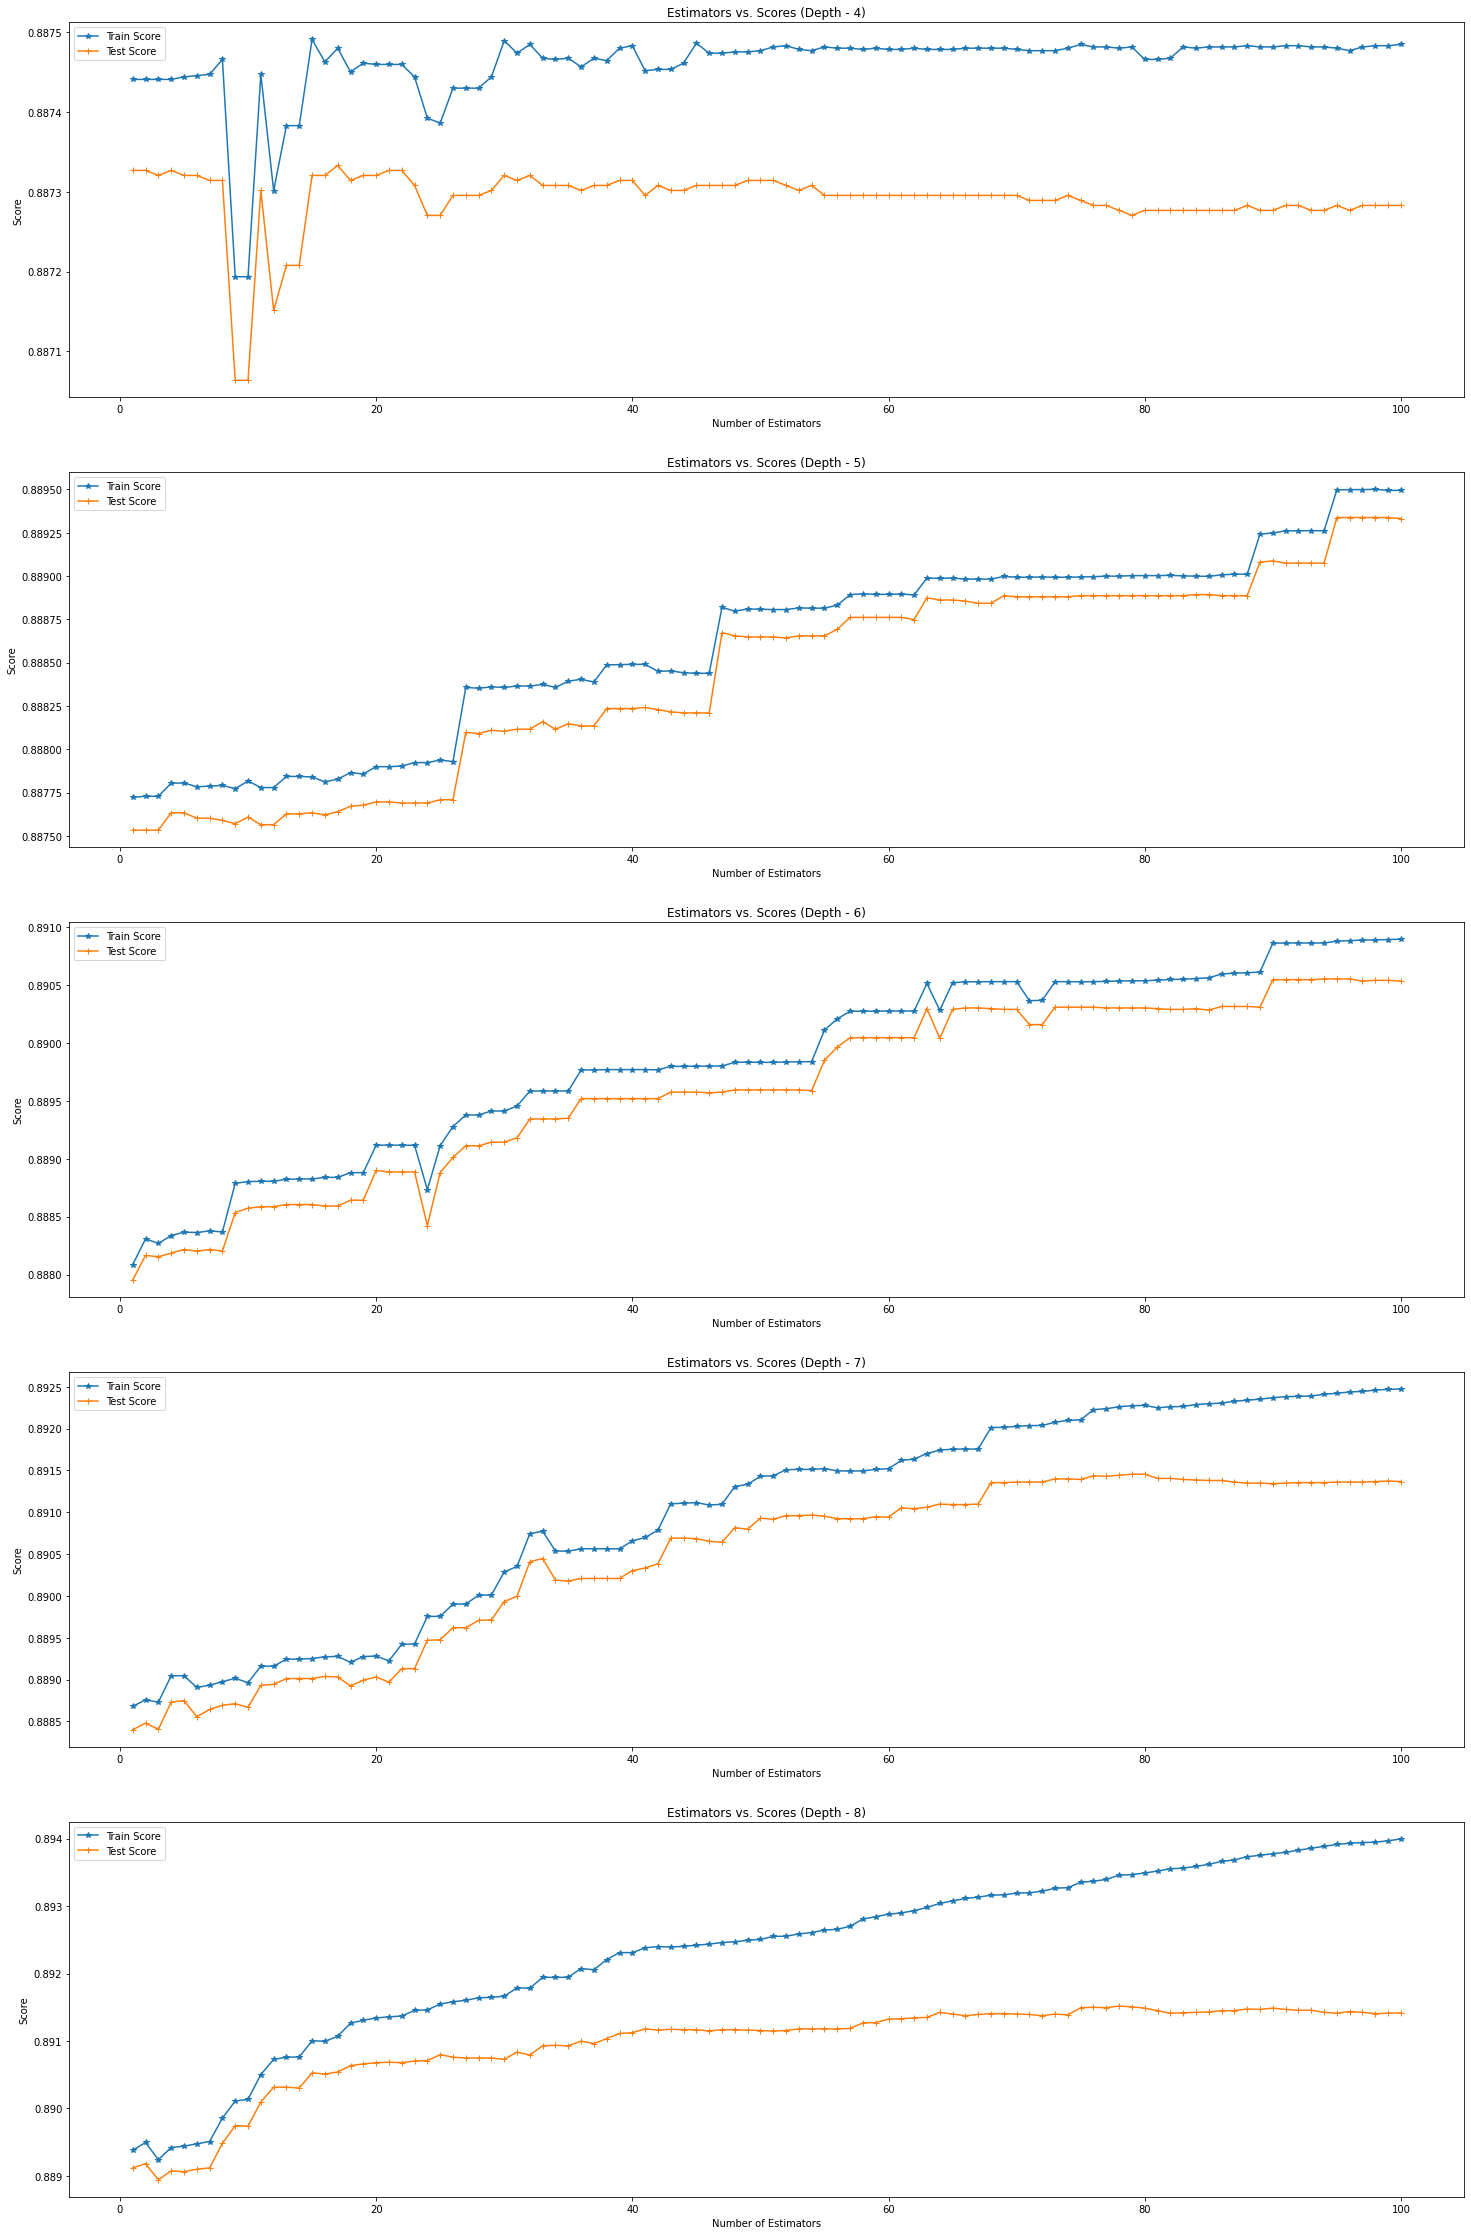

In [42]:
depths = [4,5,6,7,8]
n_estimators = 100
learning_rate = .05
num_estimators = range(1, 101)
fig, axs = plt.subplots(nrows=len(depths),ncols=1,figsize=(25,40))
score_gap = []
best_score = []
best_iteration = []

for i, depth in enumerate(depths):
    train, test = adaboost(depth,n_estimators,learning_rate)
    max_idx = np.argmax(test)
    best_score.append(test[max_idx])
    best_iteration.append(max_idx)
    score_gap.append(np.abs(train[max_idx] - test[max_idx]))
    axs[i].plot(num_estimators, train, '*-', label="Train Score")
    axs[i].plot(num_estimators, test, '-+', label="Test Score")
    axs[i].legend()
    axs[i].set_title(f"Estimators vs. Scores (Depth - {depth})")
    axs[i].set_ylabel("Score")
    axs[i].set_xlabel("Number of Estimators")  

In [43]:
boost_depth_performance = {'depths': depths, 'best test score': best_score, 'train-test delta':score_gap, 'iteration': best_iteration}
pd.DataFrame.from_dict(boost_depth_performance).set_index('depths')

best test score  train-test delta  iteration
depths                                              
4              0.887333          0.000147         16
5              0.889338          0.000160         94
6              0.890553          0.000310         93
7              0.891456          0.000819         78
8              0.891518          0.001939         77